# Analyse der Zeitreihe für die Microsoft Aktie
### Berechnung der Autokorrelation 1. Ordnung und Autokorrelation 2. Ordnung

In [6]:
# Notwendige Bibliotheken importieren
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf

# Daten einlesen
# Passe den Dateipfad entsprechend an
df = pd.read_csv('/Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/microsoft_aktien_daten.csv')

# Datum als Index setzen
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Schlusskurse extrahieren
close_prices = df['Close']

# Berechne Autokorrelation für den originalen Schlusskurs
acf_values = acf(close_prices, nlags=2)

# Ausgabe der Autokorrelationen 1. und 2. Ordnung
print("\nAutokorrelation für originale Zeitreihe (Schlusskurs):")
print("1. Ordnung:", round(acf_values[1], 4))
print("2. Ordnung:", round(acf_values[2], 4))

# Berechne erste Differenz der Schlusskurse
close_diff1 = close_prices.diff().dropna()

# Berechne Autokorrelation für die erste Differenz
acf_diff1 = acf(close_diff1, nlags=2)

# Ausgabe der Autokorrelationen 1. und 2. Ordnung für die erste Differenz
print("\nAutokorrelation für erste Differenz des Schlusskurses:")
print("1. Ordnung:", round(acf_diff1[1], 4))
print("2. Ordnung:", round(acf_diff1[2], 4))


Autokorrelation für originale Zeitreihe (Schlusskurs):
1. Ordnung: 0.9956
2. Ordnung: 0.9916

Autokorrelation für erste Differenz des Schlusskurses:
1. Ordnung: -0.0294
2. Ordnung: -0.0433


/var/folders/mh/m6ml4k8j6w55wxl7hvpbxks00000gn/T/ipykernel_77496/1649108336.py:11: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


### Transformation der Zeitreihe für Erfüllung der Bedingungen für schwache Stationarität

/var/folders/mh/m6ml4k8j6w55wxl7hvpbxks00000gn/T/ipykernel_77496/3885700905.py:10: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


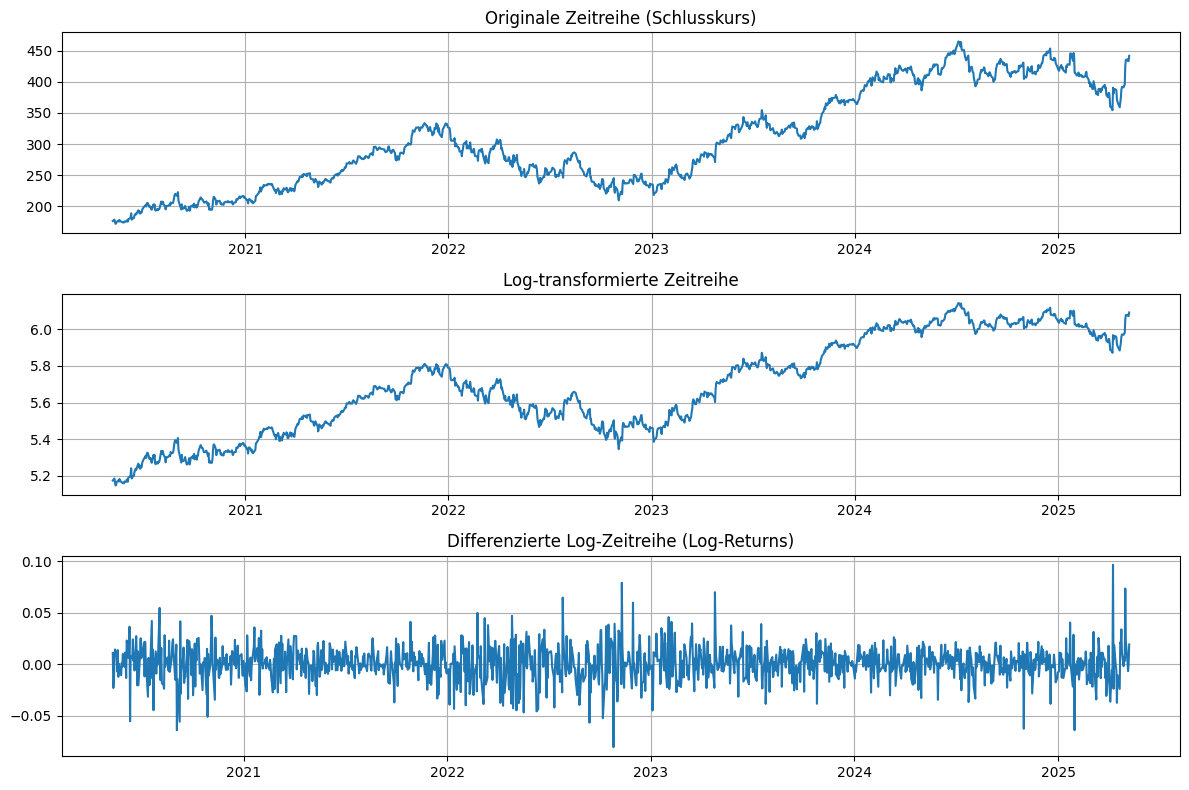

Originale Zeitreihe:
Mittelwert: 305.45
Standardabweichung: 78.51
Schiefe: 0.30
Kurtosis: -1.17

Log-transformierte Zeitreihe:
Mittelwert: 5.69
Standardabweichung: 0.26
Schiefe: -0.01
Kurtosis: -1.13

Differenzierte Log-Zeitreihe (Log-Returns):
Mittelwert: 0.00073
Standardabweichung: 0.01710
Schiefe: nan
Kurtosis: nan

Prüfung auf Stationarität für originale Zeitreihe:


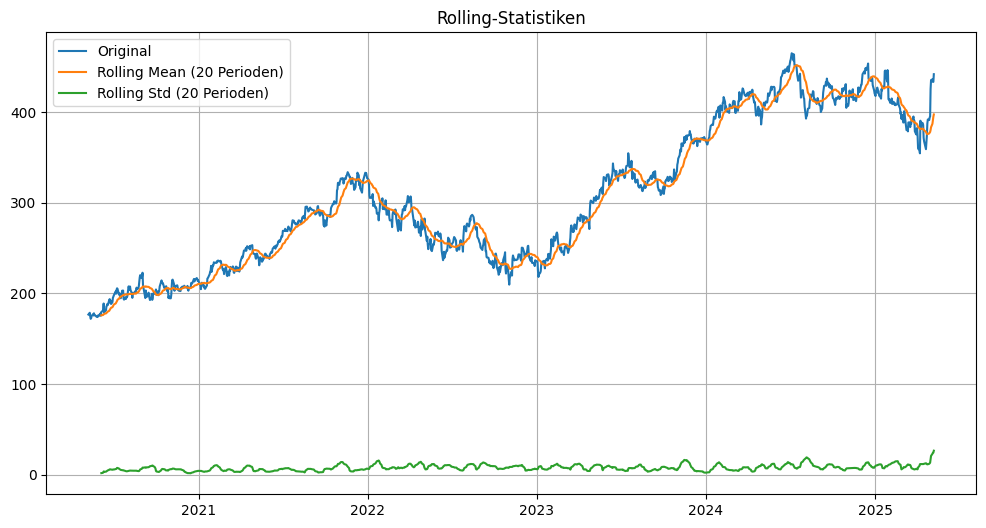

Autokorrelation 1. Ordnung: 0.9956
Autokorrelation 2. Ordnung: 0.9916

Prüfung auf Stationarität für log-transformierte Zeitreihe:


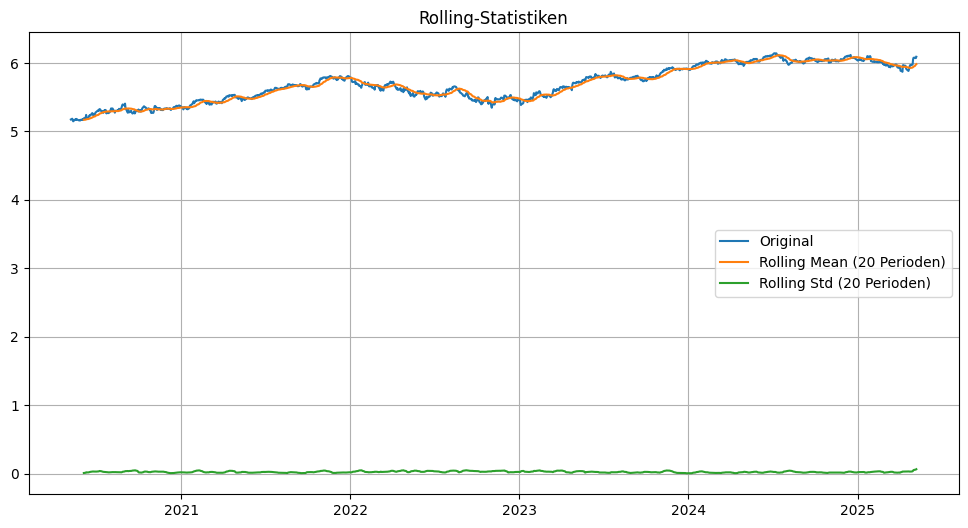

Autokorrelation 1. Ordnung: 0.9953
Autokorrelation 2. Ordnung: 0.9909

Prüfung auf Stationarität für differenzierte log-transformierte Zeitreihe:


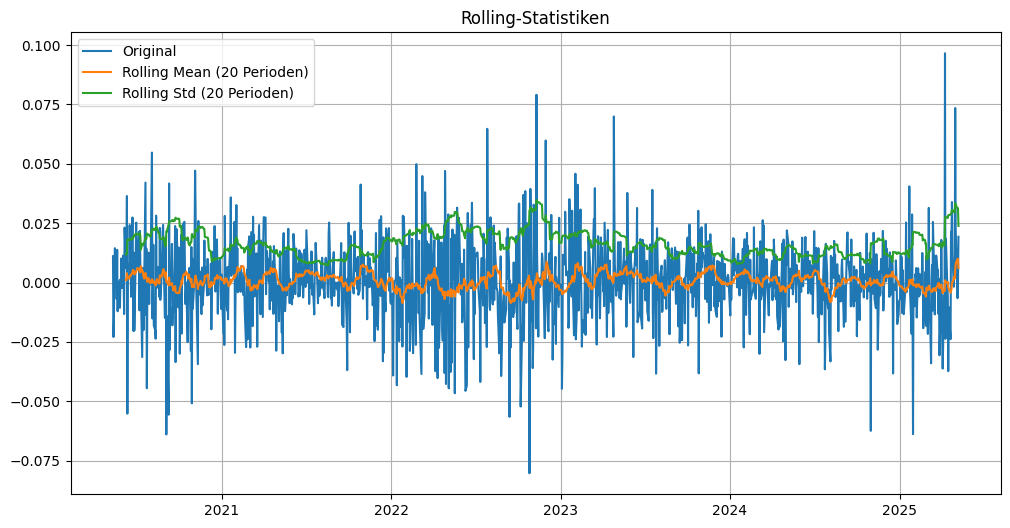

Autokorrelation 1. Ordnung: -0.0364
Autokorrelation 2. Ordnung: -0.0471


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Daten einlesen
df = pd.read_csv('/Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/microsoft_aktien_daten.csv')

# Datum als Index setzen
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Originale Zeitreihe plotten
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(df['Close'])
plt.title('Originale Zeitreihe (Schlusskurs)')
plt.grid(True)

# 1. Transformation: Logarithmieren (für konstante Varianz)
# Diese Transformation ist oft sinnvoll bei Finanzzeitreihen, da sie prozentuale
# Änderungen statt absoluter Änderungen betrachtet
df['log_close'] = np.log(df['Close'])
plt.subplot(3, 1, 2)
plt.plot(df['log_close'])
plt.title('Log-transformierte Zeitreihe')
plt.grid(True)

# 2. Transformation: Differenzieren (für konstanten Mittelwert)
# Dies entfernt Trends und macht die Zeitreihe oft stationär
df['diff_log_close'] = df['log_close'].diff().dropna()
plt.subplot(3, 1, 3)
plt.plot(df['diff_log_close'])
plt.title('Differenzierte Log-Zeitreihe (Log-Returns)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Deskriptive Statistik für jede Transformation
print("Originale Zeitreihe:")
print(f"Mittelwert: {df['Close'].mean():.2f}")
print(f"Standardabweichung: {df['Close'].std():.2f}")
print(f"Schiefe: {stats.skew(df['Close']):.2f}")
print(f"Kurtosis: {stats.kurtosis(df['Close']):.2f}\n")

print("Log-transformierte Zeitreihe:")
print(f"Mittelwert: {df['log_close'].mean():.2f}")
print(f"Standardabweichung: {df['log_close'].std():.2f}")
print(f"Schiefe: {stats.skew(df['log_close']):.2f}")
print(f"Kurtosis: {stats.kurtosis(df['log_close']):.2f}\n")

print("Differenzierte Log-Zeitreihe (Log-Returns):")
print(f"Mittelwert: {df['diff_log_close'].mean():.5f}")
print(f"Standardabweichung: {df['diff_log_close'].std():.5f}")
print(f"Schiefe: {stats.skew(df['diff_log_close']):.2f}")
print(f"Kurtosis: {stats.kurtosis(df['diff_log_close']):.2f}\n")

# Einfache Prüfung auf Stationarität mit Rolling-Statistiken
def check_stationarity(timeseries, window=20):
    # Rolling-Statistiken
    rolling_mean = timeseries.rolling(window=window).mean()
    rolling_std = timeseries.rolling(window=window).std()
    
    # Plot der Rolling-Statistiken
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, label='Original')
    plt.plot(rolling_mean, label=f'Rolling Mean ({window} Perioden)')
    plt.plot(rolling_std, label=f'Rolling Std ({window} Perioden)')
    plt.legend()
    plt.title('Rolling-Statistiken')
    plt.grid(True)
    plt.show()
    
    # Manuelle Berechnung der Autokorrelation
    def autocorrelation(x, lag):
        x = x.dropna().values
        n = len(x)
        mean = np.mean(x)
        var = np.sum((x - mean) ** 2)
        acov = np.sum((x[lag:] - mean) * (x[:n-lag] - mean))
        return acov / var
    
    # Autokorrelation 1. und 2. Ordnung
    ac1 = autocorrelation(timeseries, 1)
    ac2 = autocorrelation(timeseries, 2)
    
    print(f"Autokorrelation 1. Ordnung: {ac1:.4f}")
    print(f"Autokorrelation 2. Ordnung: {ac2:.4f}")

print("Prüfung auf Stationarität für originale Zeitreihe:")
check_stationarity(df['Close'])

print("\nPrüfung auf Stationarität für log-transformierte Zeitreihe:")
check_stationarity(df['log_close'])

print("\nPrüfung auf Stationarität für differenzierte log-transformierte Zeitreihe:")
check_stationarity(df['diff_log_close'])

### Berechnung von ACF und PACF

/var/folders/mh/m6ml4k8j6w55wxl7hvpbxks00000gn/T/ipykernel_77496/2208043068.py:9: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


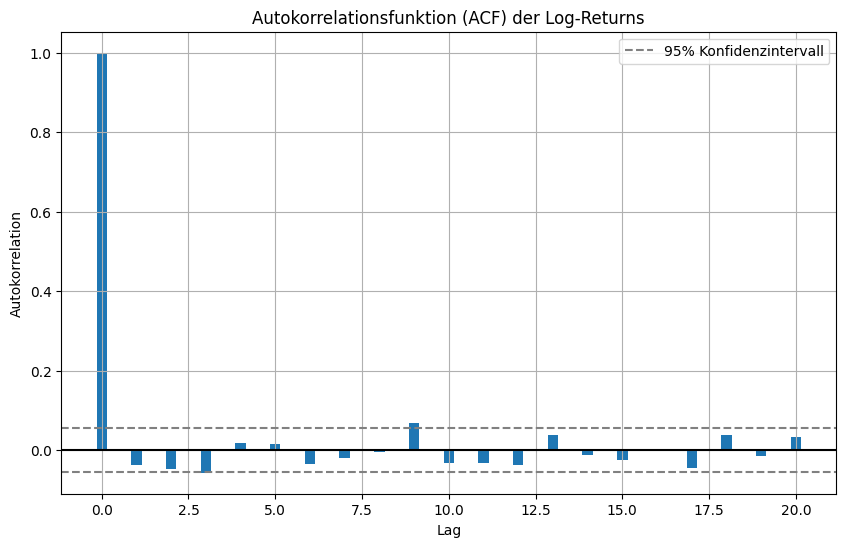

Lag	ACF
---------------
1	-0.0364 
2	-0.0472 
3	-0.0569 *
4	0.0176 
5	0.0158 
6	-0.0355 
7	-0.0199 
8	-0.0050 
9	0.0681 *
10	-0.0318 
11	-0.0335 
12	-0.0376 
13	0.0374 
14	-0.0132 
15	-0.0244 
16	-0.0027 
17	-0.0446 
18	0.0372 
19	-0.0139 
20	0.0331 

* signifikant auf 5%-Niveau


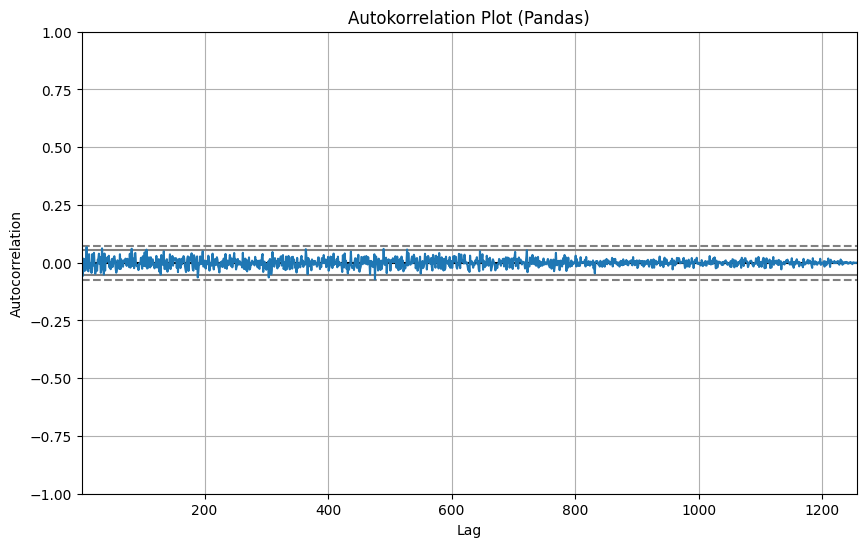

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Daten einlesen
df = pd.read_csv('/Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/microsoft_aktien_daten.csv')

# Datum als Index setzen
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Transformieren zu log-returns (differenzierte logarithmierte Preise)
df['log_return'] = np.log(df['Close']).diff().dropna()

# ACF Berechnung
def compute_acf(x, nlags=20):
    """Berechnet die Autokorrelationsfunktion für die Lags 0 bis nlags"""
    x = np.array(x)
    n = len(x)
    mean = np.mean(x)
    
    # Normalisierte Zeitreihe
    x_norm = x - mean
    
    # Varianz (für Lag 0)
    var = np.sum(x_norm**2) / n
    
    # Initialisiere ACF-Array
    acf = np.zeros(nlags + 1)
    acf[0] = 1.0  # Lag 0 ist immer 1
    
    # Berechne ACF für Lags 1 bis nlags
    for lag in range(1, nlags + 1):
        acf[lag] = np.sum(x_norm[lag:] * x_norm[:n-lag]) / ((n-lag) * var)
    
    return acf

# Berechne einfach nur die Autokorrelationen
log_returns = df['log_return'].dropna().values
acf_values = compute_acf(log_returns, nlags=20)

# Konfidenzintervalle berechnen (95%)
n = len(log_returns)
conf_interval = 1.96 / np.sqrt(n)

# ACF plotten
plt.figure(figsize=(10, 6))
lags = range(len(acf_values))
plt.bar(lags, acf_values, width=0.3)
plt.axhline(y=0, linestyle='-', color='black')
plt.axhline(y=conf_interval, linestyle='--', color='gray', label='95% Konfidenzintervall')
plt.axhline(y=-conf_interval, linestyle='--', color='gray')
plt.title('Autokorrelationsfunktion (ACF) der Log-Returns')
plt.xlabel('Lag')
plt.ylabel('Autokorrelation')
plt.grid(True)
plt.legend()
plt.show()

# Tabellarische Ausgabe der ACF-Werte
print("Lag\tACF")
print("-" * 15)
for i in range(1, 21):  # Lags 1-20 anzeigen
    significant = abs(acf_values[i]) > conf_interval
    marker = "*" if significant else ""
    print(f"{i}\t{acf_values[i]:.4f} {marker}")
print("\n* signifikant auf 5%-Niveau")

# Alternativ: Verwende Pandas für die einfache PACF Berechnung
# Da die manuelle PACF-Berechnung komplizierter ist
try:
    from pandas.plotting import autocorrelation_plot
    plt.figure(figsize=(10, 6))
    autocorrelation_plot(df['log_return'].dropna())
    plt.title('Autokorrelation Plot (Pandas)')
    plt.grid(True)
    plt.show()
except ImportError:
    print("Pandas autocorrelation_plot nicht verfügbar.")

## ARIMA-Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import warnings

class LogARIMAModeler:
    def __init__(self, csv_file, column='Close'):
        """
        Initialisiert den ARIMA-Modellierer mit log-transformierten Daten aus einer CSV-Datei.
        
        Args:
            csv_file (str): Pfad zur CSV-Datei
            column (str): Zu analysierende Spalte (Standard: 'Close')
        """
        self.column = column
        self.data = None
        self.original_series = None
        self.time_series = None  # Wird die log-transformierte Zeitreihe enthalten
        self.best_model = None
        self.best_order = None
        
        # Warnungen unterdrücken
        warnings.filterwarnings('ignore')
        
        # Daten laden
        print(f"Lade Daten aus {csv_file}...")
        self.data = pd.read_csv(csv_file)
        
        # Index-Behandlung
        if 'Date' in self.data.columns:
            self.data['Date'] = pd.to_datetime(self.data['Date'])
            self.data.set_index('Date', inplace=True)
        elif 'Unnamed: 0' in self.data.columns:
            self.data.set_index('Unnamed: 0', inplace=True)
            self.data.index = pd.to_datetime(self.data.index)
        
        # Zeitreihe extrahieren
        if self.column in self.data.columns:
            self.original_series = self.data[self.column].copy()
            # Log-Transformation anwenden
            self.time_series = np.log(self.original_series)
            print(f"Zeitreihe für '{self.column}' extrahiert und log-transformiert.")
            print(f"Zeitraum: {self.time_series.index.min()} bis {self.time_series.index.max()}")
            print(f"Anzahl Datenpunkte: {len(self.time_series)}")
        else:
            available_columns = ", ".join(self.data.columns)
            print(f"Spalte '{self.column}' nicht gefunden. Verfügbare Spalten: {available_columns}")
            if len(self.data.columns) > 0:
                self.column = self.data.columns[0]
                self.original_series = self.data[self.column].copy()
                self.time_series = np.log(self.original_series)
                print(f"Verwende stattdessen '{self.column}'.")
    
    def check_stationarity(self):
        """Prüft, ob die log-transformierte Zeitreihe stationär ist."""
        result = adfuller(self.time_series.dropna())
        is_stationary = result[1] <= 0.05
        
        print("\n--- Stationaritätstest der log-transformierten Daten ---")
        print(f"ADF Teststatistik: {result[0]:.4f}")
        print(f"p-Wert: {result[1]:.4f}")
        print("Kritische Werte:")
        for key, value in result[4].items():
            print(f"   {key}: {value:.4f}")
        
        if is_stationary:
            print("\nDie log-transformierte Zeitreihe ist STATIONÄR (p-Wert <= 0.05).")
            print("Empfehlung: Verwende d=0 in deinem ARIMA-Modell.")
        else:
            print("\nDie log-transformierte Zeitreihe ist NICHT STATIONÄR (p-Wert > 0.05).")
            print("Empfehlung: Verwende d=1 oder d=2 in deinem ARIMA-Modell.")
        
        return is_stationary
    
    def plot_comparison(self):
        """Vergleicht die originale und die log-transformierte Zeitreihe."""
        fig, axes = plt.subplots(2, 1, figsize=(14, 10))
        
        # Originale Zeitreihe
        axes[0].plot(self.original_series)
        axes[0].set_title('Originale Zeitreihe')
        axes[0].set_ylabel(self.column)
        axes[0].grid(True)
        
        # Log-transformierte Zeitreihe
        axes[1].plot(self.time_series)
        axes[1].set_title('Log-transformierte Zeitreihe')
        axes[1].set_ylabel(f'ln({self.column})')
        axes[1].grid(True)
        
        plt.tight_layout()
        plt.show()
        
        print("\nVergleich Original vs. Log-Transformation:")
        print("- Die Log-Transformation kann die Varianz stabilisieren")
        print("- Sie kann exponentielle Trends in lineare Trends umwandeln")
        print("- Sie ist besonders nützlich für Finanzdaten, die prozentuale Änderungen betonen")
    
    def plot_analysis(self, lags=20):
        """Erstellt die wichtigsten Visualisierungen für die ARIMA-Analyse mit log-transformierten Daten."""
        print("\n--- ARIMA Modell-Parameter Analyse (log-transformierte Daten) ---")
        
        # Figur erstellen
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        
        # 1. Log-transformierte Zeitreihe
        axes[0, 0].plot(self.time_series)
        axes[0, 0].set_title('Log-transformierte Zeitreihe')
        axes[0, 0].grid(True)
        
        # 2. Differenzierte log-transformierte Zeitreihe (d=1)
        diff1 = self.time_series.diff().dropna()
        axes[0, 1].plot(diff1)
        axes[0, 1].set_title('Differenzierte log-transformierte Zeitreihe (d=1)')
        axes[0, 1].grid(True)
        
        # 3. ACF der log-transformierten Zeitreihe
        plot_acf(self.time_series.dropna(), lags=lags, ax=axes[1, 0])
        axes[1, 0].set_title('ACF der log-transformierten Zeitreihe (für q)')
        
        # 4. PACF der log-transformierten Zeitreihe
        plot_pacf(self.time_series.dropna(), lags=lags, ax=axes[1, 1])
        axes[1, 1].set_title('PACF der log-transformierten Zeitreihe (für p)')
        
        plt.tight_layout()
        plt.show()
        
        print("\nInterpretation der Plots für ARIMA(p,d,q) Parameter:")
        print("- p (AR-Term): Anzahl der signifikanten Spikes in der PACF")
        print("  → Schau, wo die PACF plötzlich nicht mehr signifikant ist (unter gestrichelte Linie fällt)")
        print("- d (Differenzierung): 0 wenn stationär, 1 oder 2 wenn nicht stationär")
        print("  → Beim ADF-Test bestimmt: d=0 für stationäre, d>0 für nicht-stationäre Daten")
        print("- q (MA-Term): Anzahl der signifikanten Spikes in der ACF")
        print("  → Schau, wo die ACF plötzlich nicht mehr signifikant ist")
    
    def find_best_model(self, max_p=2, max_d=1, max_q=2):
        """
        Findet das beste ARIMA-Modell durch Grid-Suche für log-transformierte Daten.
        
        Args:
            max_p (int): Maximaler Wert für p
            max_d (int): Maximaler Wert für d
            max_q (int): Maximaler Wert für q
        """
        print(f"\n--- ARIMA Modellauswahl für log-transformierte Daten (Grid-Suche) ---")
        print(f"Teste Modelle mit p=0...{max_p}, d=0...{max_d}, q=0...{max_q}")
        
        best_aic = float('inf')
        best_bic = float('inf')
        best_model = None
        best_order = None
        
        # Alle Modelle und ihre Ergebnisse speichern
        all_results = []
        
        for p, d, q in itertools.product(range(max_p + 1), range(max_d + 1), range(max_q + 1)):
            if p == 0 and q == 0:
                continue  # Überspringe nicht-informative Modelle
            
            try:
                model = ARIMA(self.time_series, order=(p, d, q)).fit()
                
                # Ergebnisse speichern
                all_results.append({
                    'order': (p, d, q),
                    'aic': model.aic,
                    'bic': model.bic
                })
                
                print(f"ARIMA({p},{d},{q}) - AIC: {model.aic:.2f}, BIC: {model.bic:.2f}")
                
                if model.aic < best_aic:
                    best_aic = model.aic
                    best_bic = model.bic
                    best_model = model
                    best_order = (p, d, q)
            except Exception as e:
                print(f"ARIMA({p},{d},{q}) - Fehler: {str(e)[:50]}...")
                continue
        
        if best_model is None:
            print("Konnte kein passendes Modell finden.")
            return None, None
        
        self.best_model = best_model
        self.best_order = best_order
        
        # Top 3 Modelle nach AIC anzeigen
        if len(all_results) > 0:
            results_df = pd.DataFrame(all_results)
            top_models = results_df.sort_values('aic').head(3)
            
            print("\nTop 3 Modelle nach AIC:")
            for i, row in top_models.iterrows():
                p, d, q = row['order']
                print(f"  {i+1}. ARIMA({p},{d},{q}) - AIC: {row['aic']:.2f}, BIC: {row['bic']:.2f}")
        
        print(f"\nBestes Modell: ARIMA{best_order}")
        print(f"AIC: {best_aic:.2f}, BIC: {best_bic:.2f}")
        
        return best_model, best_order
    
    def forecast(self, steps=30):
        """
        Erstellt eine Prognose mit dem besten Modell und transformiert zurück in die Originalskala.
        
        Args:
            steps (int): Anzahl der Prognose-Zeitpunkte
        """
        if self.best_model is None:
            print("Kein Modell verfügbar. Führen Sie zuerst find_best_model() aus.")
            return None, None
        
        print(f"\n--- Prognose mit ARIMA{self.best_order} (log-transformierte Daten) ---")
        print(f"Erstelle Vorhersage für die nächsten {steps} Zeitpunkte")
        
        # Prognose erstellen im log-Raum
        forecast_result = self.best_model.get_forecast(steps=steps)
        log_forecast_mean = forecast_result.predicted_mean
        log_forecast_ci = forecast_result.conf_int()
        
        # Datumsindex für Prognose
        if isinstance(self.time_series.index, pd.DatetimeIndex):
            last_date = self.time_series.index[-1]
            
            # Frequenz bestimmen
            freq = pd.infer_freq(self.time_series.index)
            if freq is None:
                # Fallback auf Geschäftstage
                freq = 'B'
            
            forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=steps, freq=freq)
        else:
            last_idx = len(self.time_series)
            forecast_index = range(last_idx, last_idx + steps)
        
        # Zurücktransformation in die Originalskala
        forecast_mean = np.exp(log_forecast_mean)
        forecast_lower = np.exp(log_forecast_ci.iloc[:, 0])
        forecast_upper = np.exp(log_forecast_ci.iloc[:, 1])
        
        # Plot erstellen mit zurücktransformierten Werten
        plt.figure(figsize=(12, 6))
        
        # Historische Daten
        plt.plot(self.original_series.index, self.original_series, 'b-', label='Historische Daten')
        
        # Prognose (zurücktransformiert)
        plt.plot(forecast_index, forecast_mean, 'r-', label='Prognose')
        
        # Konfidenzintervall (zurücktransformiert)
        plt.fill_between(
            forecast_index,
            forecast_lower,
            forecast_upper,
            color='pink', alpha=0.3, label='95% Konfidenzintervall'
        )
        
        plt.title(f'ARIMA{self.best_order} Prognose mit log-transformierten Daten')
        plt.xlabel('Datum')
        plt.ylabel(self.column)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
        # Plot der log-transformierten Daten und Prognose
        plt.figure(figsize=(12, 6))
        plt.plot(self.time_series.index, self.time_series, 'b-', label='Log-transformierte Daten')
        plt.plot(forecast_index, log_forecast_mean, 'r-', label='Log-Prognose')
        plt.fill_between(
            forecast_index,
            log_forecast_ci.iloc[:, 0],
            log_forecast_ci.iloc[:, 1],
            color='pink', alpha=0.3, label='95% Konfidenzintervall (log)'
        )
        plt.title(f'ARIMA{self.best_order} Prognose (Log-Skala)')
        plt.xlabel('Datum')
        plt.ylabel(f'ln({self.column})')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
        # Vorhersagewerte anzeigen
        forecast_df = pd.DataFrame({
            'Log_Prognose': log_forecast_mean,
            'Prognose': forecast_mean,
            'Untere_Grenze': forecast_lower,
            'Obere_Grenze': forecast_upper
        }, index=forecast_index)
        
        print("\nPrognose für die nächsten Zeitpunkte (zurücktransformiert):")
        print(forecast_df[['Prognose', 'Untere_Grenze', 'Obere_Grenze']].head())
        
        return forecast_mean, (forecast_lower, forecast_upper)

# Hauptfunktion
def main():
    # CSV-Datei angeben
    csv_file = "microsoft_aktien_daten.csv"
    
    # ARIMA-Modeler für log-transformierte Daten erstellen
    log_arima = LogARIMAModeler(csv_file)
    
    # Vergleich zwischen Original und log-transformierten Daten zeigen
    log_arima.plot_comparison()
    
    # Stationarität prüfen
    log_arima.check_stationarity()
    
    # Wichtige Plots anzeigen
    log_arima.plot_analysis()
    
    # Bestes Modell finden
    log_arima.find_best_model(max_p=2, max_d=1, max_q=2)
    
    # Prognose erstellen
    log_arima.forecast(steps=30)

### Ausführen der Funktion

Lade Daten aus microsoft_aktien_daten.csv...
Zeitreihe für 'Close' extrahiert und log-transformiert.
Zeitraum: 2020-05-08 00:00:00-04:00 bis 2025-05-08 00:00:00-04:00
Anzahl Datenpunkte: 1257


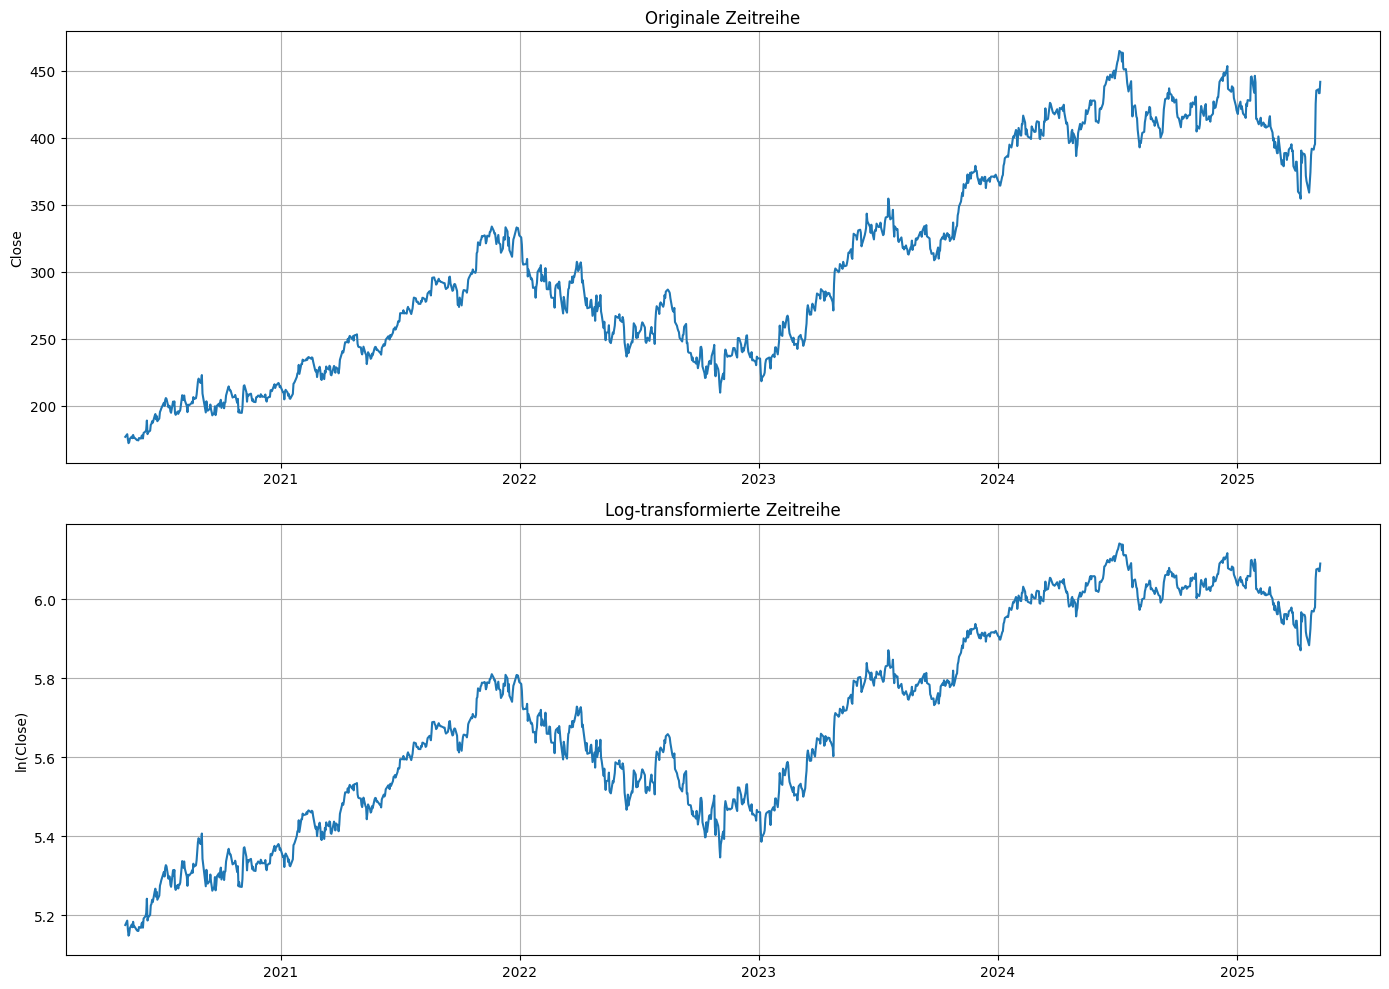


Vergleich Original vs. Log-Transformation:
- Die Log-Transformation kann die Varianz stabilisieren
- Sie kann exponentielle Trends in lineare Trends umwandeln
- Sie ist besonders nützlich für Finanzdaten, die prozentuale Änderungen betonen

--- Stationaritätstest der log-transformierten Daten ---
ADF Teststatistik: -1.4982
p-Wert: 0.5344
Kritische Werte:
   1%: -3.4356
   5%: -2.8638
   10%: -2.5680

Die log-transformierte Zeitreihe ist NICHT STATIONÄR (p-Wert > 0.05).
Empfehlung: Verwende d=1 oder d=2 in deinem ARIMA-Modell.

--- ARIMA Modell-Parameter Analyse (log-transformierte Daten) ---


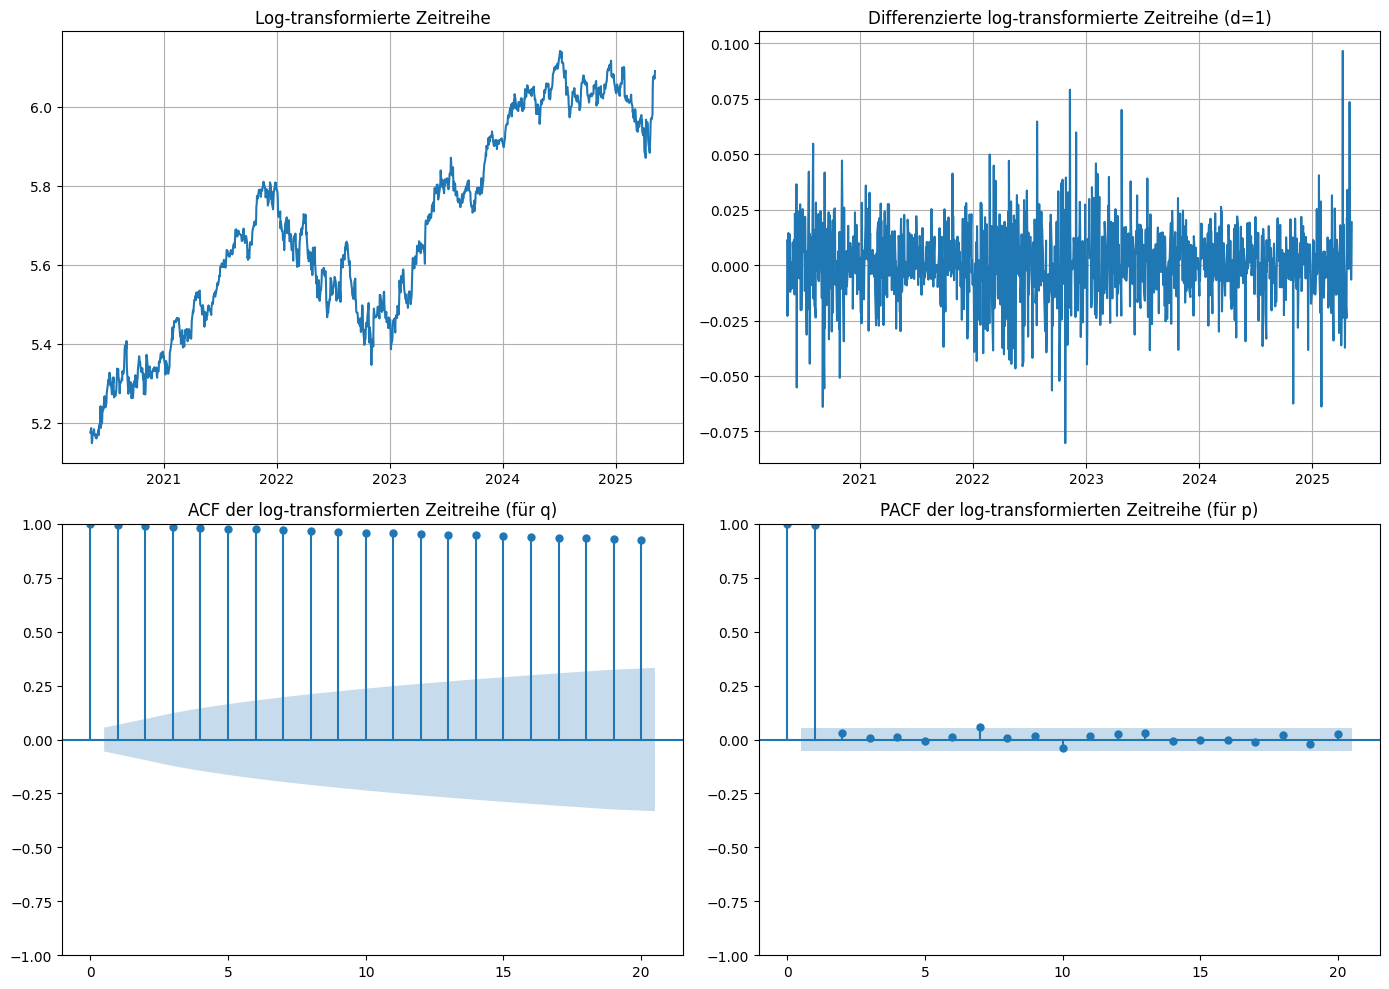


Interpretation der Plots für ARIMA(p,d,q) Parameter:
- p (AR-Term): Anzahl der signifikanten Spikes in der PACF
  → Schau, wo die PACF plötzlich nicht mehr signifikant ist (unter gestrichelte Linie fällt)
- d (Differenzierung): 0 wenn stationär, 1 oder 2 wenn nicht stationär
  → Beim ADF-Test bestimmt: d=0 für stationäre, d>0 für nicht-stationäre Daten
- q (MA-Term): Anzahl der signifikanten Spikes in der ACF
  → Schau, wo die ACF plötzlich nicht mehr signifikant ist

--- ARIMA Modellauswahl für log-transformierte Daten (Grid-Suche) ---
Teste Modelle mit p=0...2, d=0...1, q=0...2
ARIMA(0,0,1) - AIC: -1451.16, BIC: -1435.75
ARIMA(0,0,2) - AIC: -2711.85, BIC: -2691.30
ARIMA(0,1,1) - AIC: -6652.80, BIC: -6642.53
ARIMA(0,1,2) - AIC: -6653.76, BIC: -6638.35
ARIMA(1,0,0) - AIC: -6647.46, BIC: -6632.05
ARIMA(1,0,1) - AIC: -6646.82, BIC: -6626.27
ARIMA(1,0,2) - AIC: -6647.54, BIC: -6621.85
ARIMA(1,1,0) - AIC: -6652.64, BIC: -6642.37
ARIMA(1,1,1) - AIC: -6650.71, BIC: -6635.31
ARIMA(1,1,2) - A

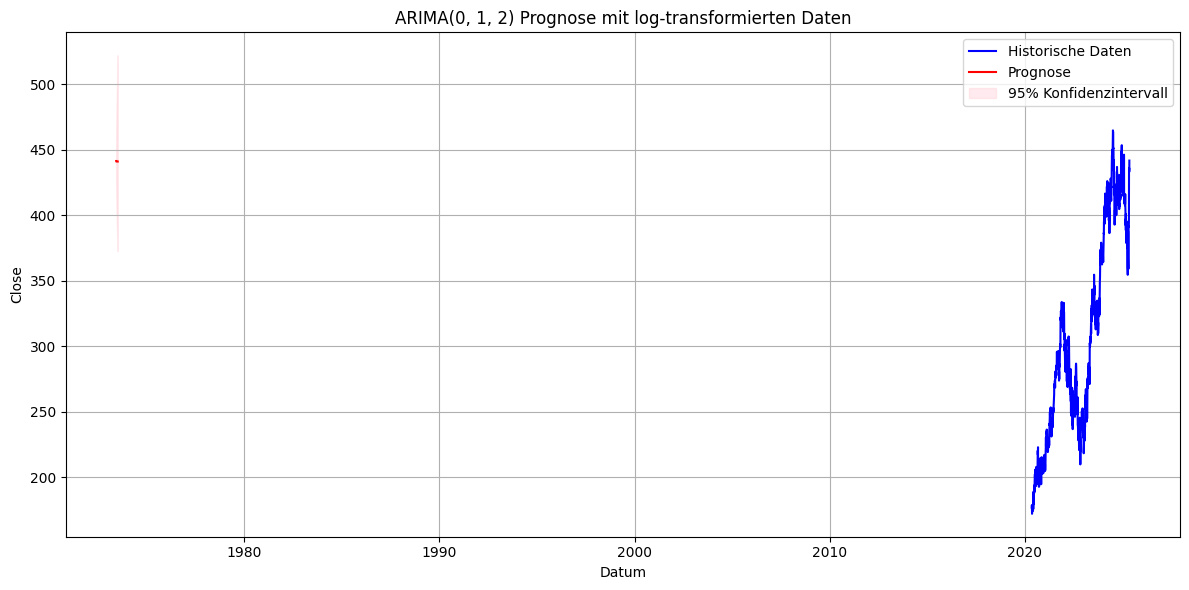

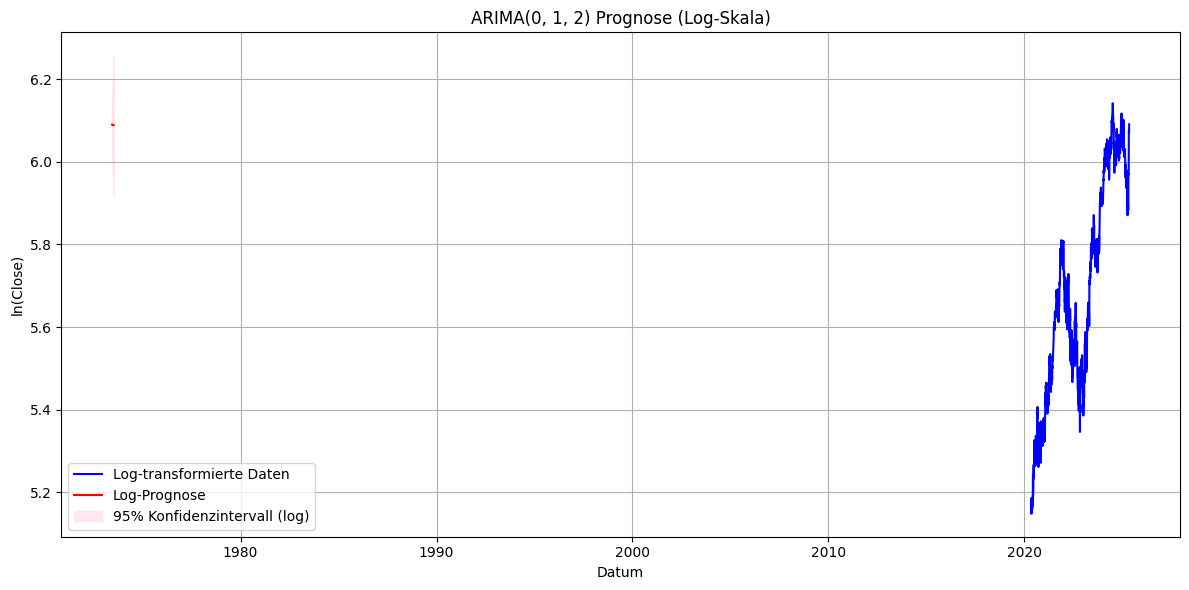


Prognose für die nächsten Zeitpunkte (zurücktransformiert):
        Prognose  Untere_Grenze  Obere_Grenze
1257  441.458966     426.931374    456.480902
1258  441.087155     421.083920    462.040626
1259  441.087155     417.217538    466.322386
1260  441.087155     413.934946    470.020422
1261  441.087155     411.039268    473.331609


In [2]:
if __name__ == "__main__":
    main()

# Neuer Code
## Test auf Stationarität
### ADF-Test

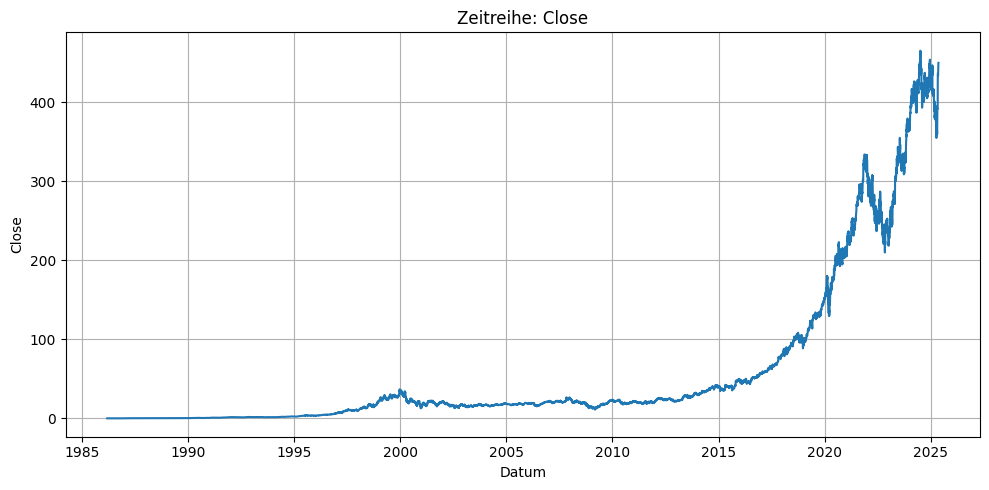

Augmented Dickey-Fuller Test für 'Close':
ADF Teststatistik: 3.9200
p-Wert: 1.0000
Kritische Werte:
   1%: -3.4310
   5%: -2.8618
   10%: -2.5669

Ergebnis: Die Zeitreihe ist NICHT STATIONÄR (p-Wert > 0.05)
Interpretation: Die Zeitreihe hat einen Einheitswurzel-Prozess.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def perform_adf_test(file_path, column='Close'):
    """
    Führt den Augmented Dickey-Fuller (ADF) Test durch, um die Stationarität einer Zeitreihe zu prüfen.
    
    Args:
        file_path (str): Pfad zur CSV-Datei mit den Aktiendaten
        column (str): Name der zu analysierenden Spalte (Standard: 'Close')
    
    Returns:
        bool: True wenn stationär, False wenn nicht stationär
    """
    # Daten laden
    df = pd.read_csv(file_path)
    
    # Datum als Index setzen
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    
    # Zeitreihe visualisieren
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df[column])
    plt.title(f'Zeitreihe: {column}')
    plt.xlabel('Datum')
    plt.ylabel(column)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # ADF-Test durchführen
    print(f"Augmented Dickey-Fuller Test für '{column}':")
    result = adfuller(df[column].dropna())
    
    # Ergebnisse ausgeben
    print(f"ADF Teststatistik: {result[0]:.4f}")
    print(f"p-Wert: {result[1]:.4f}")
    print("Kritische Werte:")
    for key, value in result[4].items():
        print(f"   {key}: {value:.4f}")
    
    # Entscheidung über Stationarität
    is_stationary = result[1] <= 0.05
    
    if is_stationary:
        print("\nErgebnis: Die Zeitreihe ist STATIONÄR (p-Wert <= 0.05)")
        print("Interpretation: Die Zeitreihe hat keinen Einheitswurzel-Prozess.")
    else:
        print("\nErgebnis: Die Zeitreihe ist NICHT STATIONÄR (p-Wert > 0.05)")
        print("Interpretation: Die Zeitreihe hat einen Einheitswurzel-Prozess.")
    
    return is_stationary

# Beispielaufruf
if __name__ == "__main__":
    # Passe den Pfad zur tatsächlichen CSV-Datei an
    file_path = "/Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/msft_aktien_daten.csv"
    
    # ADF-Test durchführen
    is_stationary = perform_adf_test(file_path, 'Close')

### PP-Test

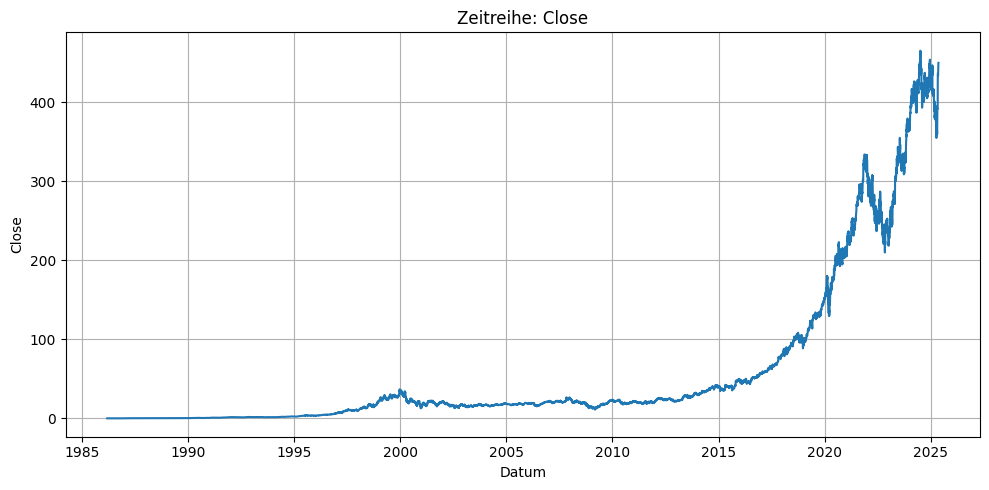

Phillips-Perron Test für 'Close':
PP Teststatistik: 3.7024
p-Wert: 1.0000
Kritische Werte:
   1%: -3.4310
   5%: -2.8618
   10%: -2.5669

Ergebnis: Die Zeitreihe ist NICHT STATIONÄR (p-Wert > 0.05)
Interpretation: Die Nullhypothese einer Einheitswurzel kann nicht abgelehnt werden.
Der PP-Test ist robuster gegenüber Heteroskedastizität als der ADF-Test.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from arch.unitroot import PhillipsPerron

def perform_pp_test(file_path, column='Close'):
    """
    Führt den Phillips-Perron (PP) Test durch, um die Stationarität einer Zeitreihe zu prüfen.
    Verwendet das arch-Paket statt statsmodels.
    
    Args:
        file_path (str): Pfad zur CSV-Datei mit den Aktiendaten
        column (str): Name der zu analysierenden Spalte (Standard: 'Close')
    
    Returns:
        bool: True wenn stationär, False wenn nicht stationär
    """
    # Daten laden
    df = pd.read_csv(file_path)
    
    # Datum als Index setzen
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    
    # Zeitreihe visualisieren
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df[column])
    plt.title(f'Zeitreihe: {column}')
    plt.xlabel('Datum')
    plt.ylabel(column)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # PP-Test mit arch-Paket durchführen
    print(f"Phillips-Perron Test für '{column}':")
    pp_test = PhillipsPerron(df[column].dropna())
    result = pp_test.stat
    pvalue = pp_test.pvalue
    critical_values = pp_test.critical_values
    
    # Ergebnisse ausgeben
    print(f"PP Teststatistik: {result:.4f}")
    print(f"p-Wert: {pvalue:.4f}")
    print("Kritische Werte:")
    for key, value in critical_values.items():
        print(f"   {key}: {value:.4f}")
    
    # Entscheidung über Stationarität
    is_stationary = pvalue <= 0.05
    
    if is_stationary:
        print("\nErgebnis: Die Zeitreihe ist STATIONÄR (p-Wert <= 0.05)")
        print("Interpretation: Die Nullhypothese einer Einheitswurzel wird abgelehnt.")
    else:
        print("\nErgebnis: Die Zeitreihe ist NICHT STATIONÄR (p-Wert > 0.05)")
        print("Interpretation: Die Nullhypothese einer Einheitswurzel kann nicht abgelehnt werden.")
        print("Der PP-Test ist robuster gegenüber Heteroskedastizität als der ADF-Test.")
    
    return is_stationary

# Beispielaufruf
if __name__ == "__main__":
    # Passe den Pfad zur tatsächlichen CSV-Datei an
    file_path = "/Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/msft_aktien_daten.csv"
    
    try:
        # PP-Test durchführen
        is_stationary = perform_pp_test(file_path, 'Close')
    except ImportError:
        print("\nFehler: Das 'arch'-Paket ist nicht installiert.")
        print("Bitte installiere es mit: pip install arch")
        print("Alternativ kannst du den ADF-Test aus statsmodels verwenden.")

### KPSS-Test

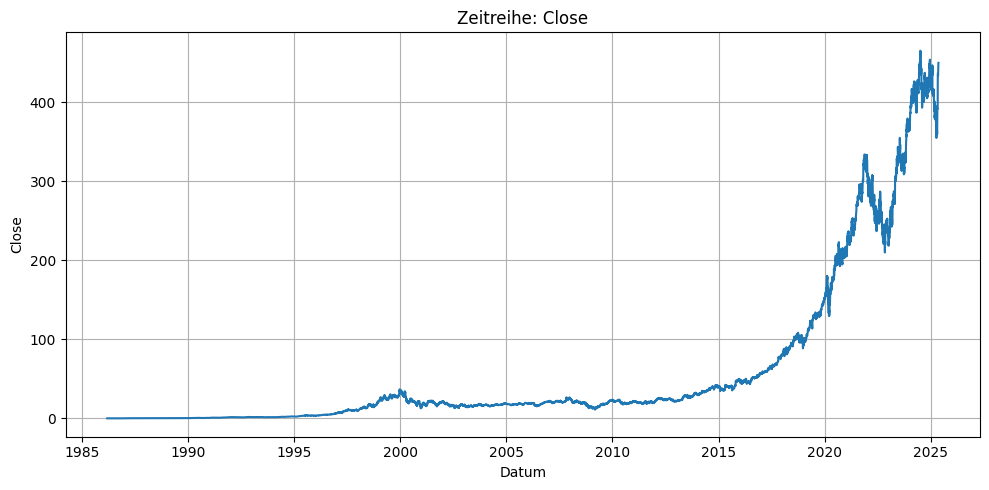

KPSS-Test für 'Close':
KPSS Teststatistik: 8.8185
p-Wert: 0.0100
Kritische Werte:
   10%: 0.3470
   5%: 0.4630
   2.5%: 0.5740
   1%: 0.7390

Ergebnis: Die Zeitreihe ist NICHT STATIONÄR (p-Wert <= 0.05)
Interpretation: Die Nullhypothese der Stationarität wird abgelehnt.

Hinweis: Der KPSS-Test hat eine umgekehrte Null-Hypothese im Vergleich zu ADF/PP:
- KPSS: Null-Hypothese ist Stationarität
- ADF/PP: Null-Hypothese ist Nicht-Stationarität (Einheitswurzel)


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import kpss

def perform_kpss_test(file_path, column='Close'):
    """
    Führt den KPSS-Test (Kwiatkowski-Phillips-Schmidt-Shin) durch, um die Stationarität einer Zeitreihe zu prüfen.
    
    Args:
        file_path (str): Pfad zur CSV-Datei mit den Aktiendaten
        column (str): Name der zu analysierenden Spalte (Standard: 'Close')
    
    Returns:
        bool: True wenn stationär, False wenn nicht stationär
    """
    # Daten laden
    df = pd.read_csv(file_path)
    
    # Datum als Index setzen
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    
    # Zeitreihe visualisieren
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df[column])
    plt.title(f'Zeitreihe: {column}')
    plt.xlabel('Datum')
    plt.ylabel(column)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # KPSS-Test durchführen
    print(f"KPSS-Test für '{column}':")
    
    # Hinweis: KPSS hat umgekehrte Null-Hypothese im Vergleich zu ADF/PP
    # Null-Hypothese: Die Zeitreihe ist stationär
    # Alternative Hypothese: Die Zeitreihe hat eine Einheitswurzel (nicht stationär)
    result = kpss(df[column].dropna(), regression='c', nlags='auto')
    
    # Ergebnisse ausgeben
    print(f"KPSS Teststatistik: {result[0]:.4f}")
    print(f"p-Wert: {result[1]:.4f}")
    print("Kritische Werte:")
    for key, value in result[3].items():
        print(f"   {key}: {value:.4f}")
    
    # WICHTIG: Bei KPSS ist die Interpretation anders als bei ADF/PP!
    # p-Wert > 0.05: Nicht genug Beweise, um die Null-Hypothese der Stationarität zu verwerfen
    # p-Wert <= 0.05: Ablehnung der Null-Hypothese, die Zeitreihe ist NICHT stationär
    is_stationary = result[1] > 0.05
    
    if is_stationary:
        print("\nErgebnis: Die Zeitreihe ist STATIONÄR (p-Wert > 0.05)")
        print("Interpretation: Die Nullhypothese der Stationarität kann nicht abgelehnt werden.")
    else:
        print("\nErgebnis: Die Zeitreihe ist NICHT STATIONÄR (p-Wert <= 0.05)")
        print("Interpretation: Die Nullhypothese der Stationarität wird abgelehnt.")
    
    print("\nHinweis: Der KPSS-Test hat eine umgekehrte Null-Hypothese im Vergleich zu ADF/PP:")
    print("- KPSS: Null-Hypothese ist Stationarität")
    print("- ADF/PP: Null-Hypothese ist Nicht-Stationarität (Einheitswurzel)")
    
    return is_stationary

# Beispielaufruf
if __name__ == "__main__":
    # Passe den Pfad zur tatsächlichen CSV-Datei an
    file_path = "/Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/msft_aktien_daten.csv"
    
    # KPSS-Test durchführen
    is_stationary = perform_kpss_test(file_path, 'Close')

## Log. Differenzierung

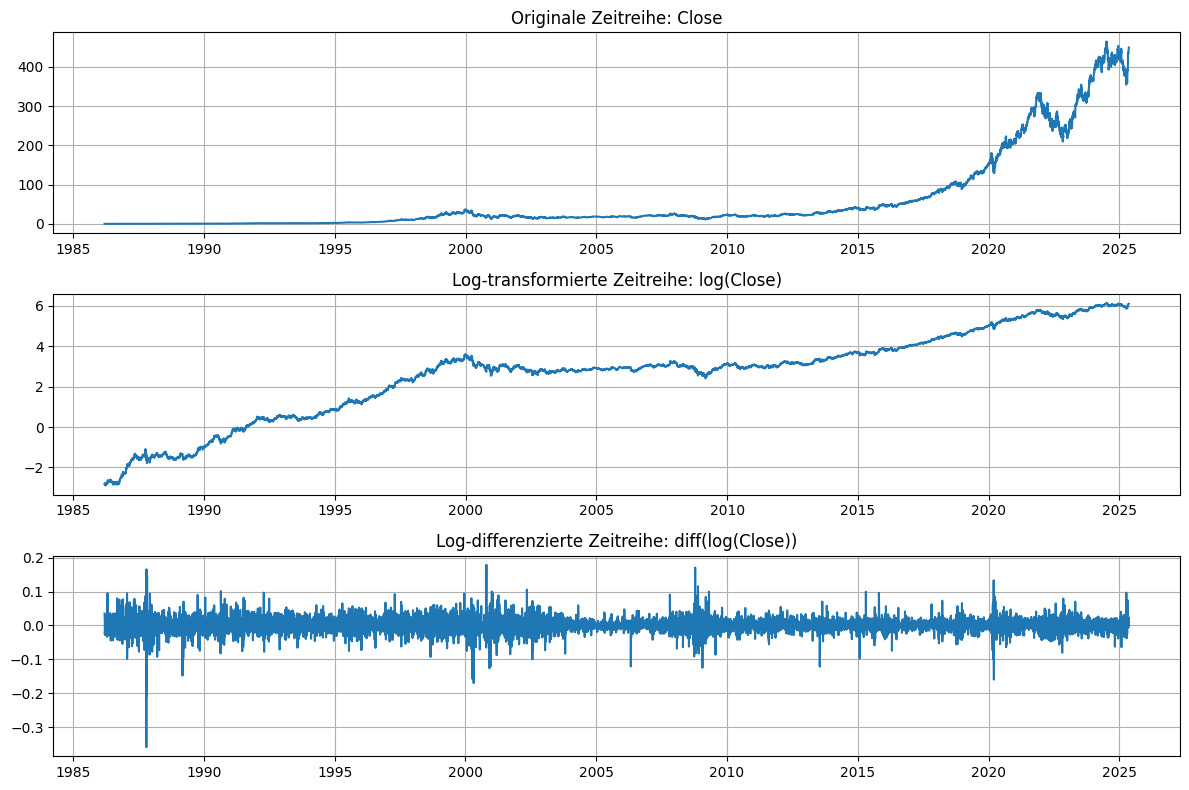


Log-differenzierte Daten wurden gespeichert unter: /Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/msft_aktien_daten_log_diff.csv

Log-differenzierte Zeitreihe für 'Close':
Anzahl der Datenpunkte: 9868
Erster Wert: 0.035089 (am 1986-03-14)
Letzter Wert: 0.000579 (am 2025-05-13)
Minimum: -0.358332
Maximum: 0.178692
Mittelwert: 0.000905
Standardabweichung: 0.021092

Hinweis: Die log-differenzierte Zeitreihe entspricht den täglichen logarithmischen Renditen.

--- ADF-Test für die log-differenzierte Zeitreihe ---
ADF Teststatistik: -53.3098
p-Wert: 0.0000
Kritische Werte:
   1%: -3.4310
   5%: -2.8618
   10%: -2.5669

Ergebnis ADF: Die log-differenzierte Zeitreihe ist STATIONÄR (p-Wert <= 0.05)

--- KPSS-Test für die log-differenzierte Zeitreihe ---
KPSS Teststatistik: 0.4881
p-Wert: 0.0444
Kritische Werte:
   10%: 0.3470
   5%: 0.4630
   2.5%: 0.5740
   1%: 0.7390

Ergebnis KPSS: Die log-differenzierte Zeitreihe ist NICHT STATIONÄR (p-Wert <= 0.05)


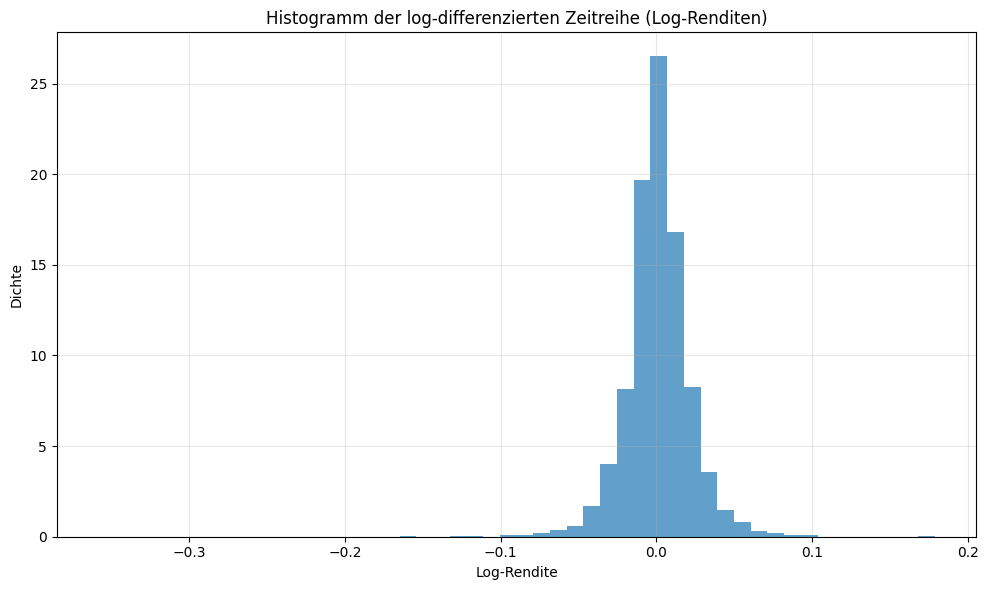


Fazit:
Die log-differenzierte Zeitreihe (auch bekannt als logarithmische Rendite)
ist eine gängige Transformation für Aktienkursdaten, die typischerweise zu
einer stationären Zeitreihe führt und für ARIMA-Modellierung verwendet werden kann.

Die transformierten Daten wurden gespeichert und können für weitere Analysen verwendet werden.
CSV-Datei: /Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/msft_aktien_daten_log_diff.csv


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.stattools import adfuller, kpss

def log_diff_transformation(file_path, column='Close', save_csv=True):
    """
    Führt eine logarithmische Differenzierung auf der Zeitreihe durch, überprüft deren Stationarität
    und speichert die transformierte Zeitreihe als CSV-Datei.
    
    Args:
        file_path (str): Pfad zur CSV-Datei mit den Aktiendaten
        column (str): Name der zu analysierenden Spalte (Standard: 'Close')
        save_csv (bool): Wenn True, wird die transformierte Zeitreihe als CSV gespeichert
    
    Returns:
        pandas.DataFrame: DataFrame mit der log-differenzierten Zeitreihe
        str: Pfad zur gespeicherten CSV-Datei (wenn save_csv=True)
    """
    # Daten laden
    df = pd.read_csv(file_path)
    
    # Datum als Index setzen
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    
    # 1. Originale Zeitreihe visualisieren
    plt.figure(figsize=(12, 8))
    
    plt.subplot(3, 1, 1)
    plt.plot(df.index, df[column])
    plt.title(f'Originale Zeitreihe: {column}')
    plt.grid(True)
    
    # 2. Log-Transformation
    log_series = np.log(df[column])
    plt.subplot(3, 1, 2)
    plt.plot(df.index, log_series)
    plt.title(f'Log-transformierte Zeitreihe: log({column})')
    plt.grid(True)
    
    # 3. Log-Differenzierung
    log_diff_series = log_series.diff().dropna()
    
    plt.subplot(3, 1, 3)
    plt.plot(log_diff_series.index, log_diff_series)
    plt.title(f'Log-differenzierte Zeitreihe: diff(log({column}))')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Erstelle ein DataFrame mit allen relevanten Daten
    result_df = pd.DataFrame({
        'Original': df[column],
        'Log': log_series,
        'Log_Diff': np.nan  # Zunächst mit NaN füllen
    })
    
    # Log_Diff korrekt einsetzen (ein Datenpunkt weniger als die anderen Serien)
    result_df.loc[log_diff_series.index, 'Log_Diff'] = log_diff_series
    
    # CSV-Datei speichern
    output_path = None
    if save_csv:
        # Erstelle Dateinamen basierend auf dem ursprünglichen Dateinamen
        base_name = os.path.basename(file_path)
        name_without_ext = os.path.splitext(base_name)[0]
        output_dir = os.path.dirname(file_path)
        
        # Neuer Dateiname mit _log_diff Suffix
        output_path = os.path.join(output_dir, f"{name_without_ext}_log_diff.csv")
        
        # Speichern
        result_df.to_csv(output_path)
        print(f"\nLog-differenzierte Daten wurden gespeichert unter: {output_path}")
    
    print(f"\nLog-differenzierte Zeitreihe für '{column}':")
    print(f"Anzahl der Datenpunkte: {log_diff_series.count()}")
    print(f"Erster Wert: {log_diff_series.iloc[0]:.6f} (am {log_diff_series.index[0].date()})")
    print(f"Letzter Wert: {log_diff_series.iloc[-1]:.6f} (am {log_diff_series.index[-1].date()})")
    print(f"Minimum: {log_diff_series.min():.6f}")
    print(f"Maximum: {log_diff_series.max():.6f}")
    print(f"Mittelwert: {log_diff_series.mean():.6f}")
    print(f"Standardabweichung: {log_diff_series.std():.6f}")
    
    # Diese Transformation entspricht den logarithmischen Renditen
    print("\nHinweis: Die log-differenzierte Zeitreihe entspricht den täglichen logarithmischen Renditen.")
    
    # ADF-Test für die log-differenzierte Zeitreihe
    print("\n--- ADF-Test für die log-differenzierte Zeitreihe ---")
    adf_result = adfuller(log_diff_series.dropna())
    
    print(f"ADF Teststatistik: {adf_result[0]:.4f}")
    print(f"p-Wert: {adf_result[1]:.4f}")
    print("Kritische Werte:")
    for key, value in adf_result[4].items():
        print(f"   {key}: {value:.4f}")
    
    adf_stationary = adf_result[1] <= 0.05
    
    if adf_stationary:
        print("\nErgebnis ADF: Die log-differenzierte Zeitreihe ist STATIONÄR (p-Wert <= 0.05)")
    else:
        print("\nErgebnis ADF: Die log-differenzierte Zeitreihe ist NICHT STATIONÄR (p-Wert > 0.05)")
    
    # KPSS-Test für die log-differenzierte Zeitreihe
    print("\n--- KPSS-Test für die log-differenzierte Zeitreihe ---")
    kpss_result = kpss(log_diff_series.dropna(), regression='c', nlags='auto')
    
    print(f"KPSS Teststatistik: {kpss_result[0]:.4f}")
    print(f"p-Wert: {kpss_result[1]:.4f}")
    print("Kritische Werte:")
    for key, value in kpss_result[3].items():
        print(f"   {key}: {value:.4f}")
    
    kpss_stationary = kpss_result[1] > 0.05
    
    if kpss_stationary:
        print("\nErgebnis KPSS: Die log-differenzierte Zeitreihe ist STATIONÄR (p-Wert > 0.05)")
    else:
        print("\nErgebnis KPSS: Die log-differenzierte Zeitreihe ist NICHT STATIONÄR (p-Wert <= 0.05)")
    
    # Histogramm der log-differenzierten Zeitreihe
    plt.figure(figsize=(10, 6))
    plt.hist(log_diff_series, bins=50, alpha=0.7, density=True)
    plt.title('Histogramm der log-differenzierten Zeitreihe (Log-Renditen)')
    plt.xlabel('Log-Rendite')
    plt.ylabel('Dichte')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return result_df, output_path if save_csv else None

# Beispielaufruf
if __name__ == "__main__":
    # Passe den Pfad zur tatsächlichen CSV-Datei an
    file_path = "/Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/msft_aktien_daten.csv"
    
    # Log-Differenzierung durchführen, Stationarität testen und als CSV speichern
    result_df, saved_path = log_diff_transformation(file_path, 'Close', save_csv=True)
    
    print("\nFazit:")
    print("Die log-differenzierte Zeitreihe (auch bekannt als logarithmische Rendite)")
    print("ist eine gängige Transformation für Aktienkursdaten, die typischerweise zu")
    print("einer stationären Zeitreihe führt und für ARIMA-Modellierung verwendet werden kann.")
    
    if saved_path:
        print(f"\nDie transformierten Daten wurden gespeichert und können für weitere Analysen verwendet werden.")
        print(f"CSV-Datei: {saved_path}")

## ACF & PACF für log. differenzierte Zeitreihe

Lade log-differenzierte Daten aus: /Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/msft_aktien_daten_log_diff.csv
Verwende vorhandene 'Log_Diff' Spalte.


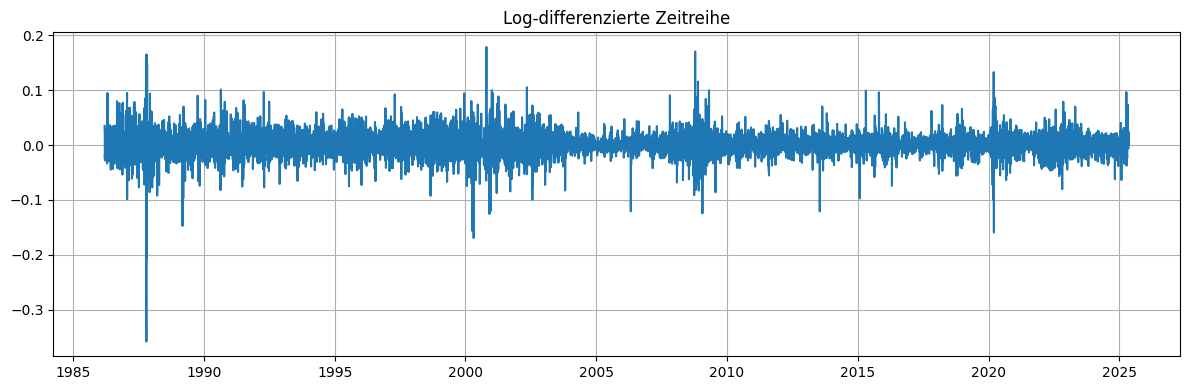

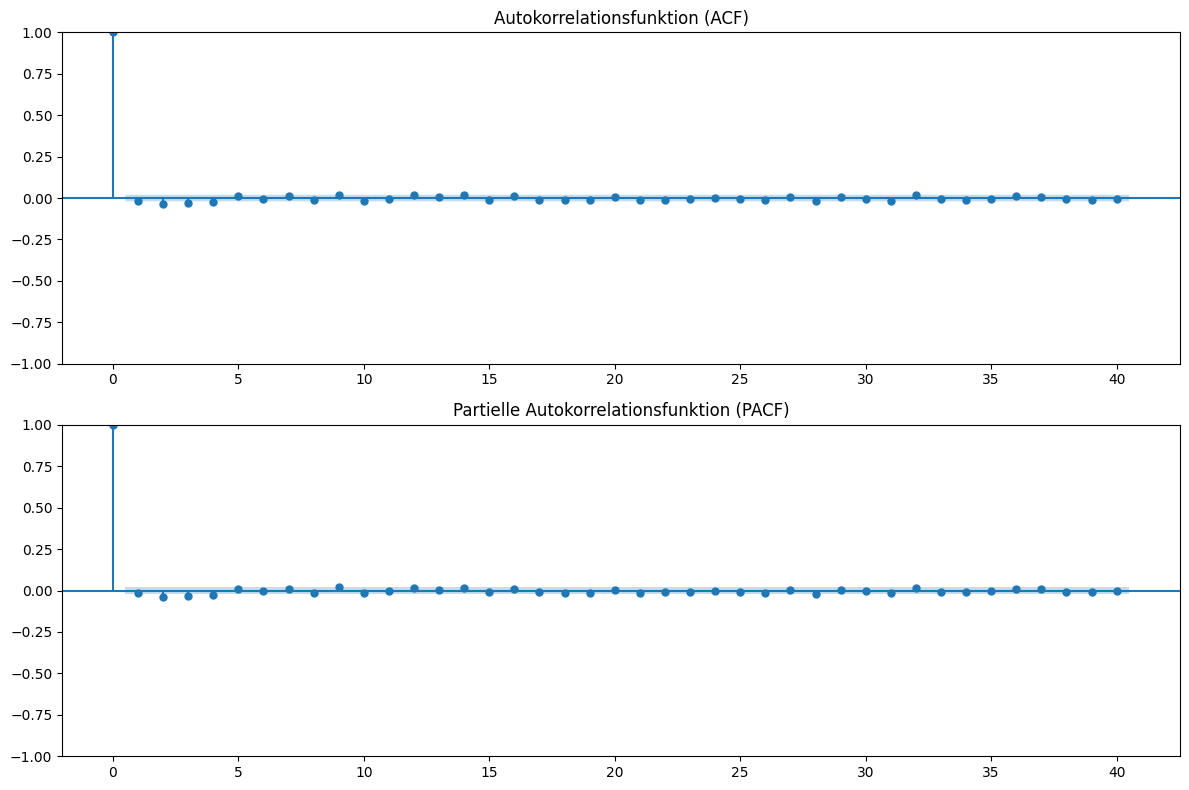


Interpretation der ACF/PACF-Plots für ARIMA-Modellierung:

1. Identifizierte signifikante Lags:
   ACF: [2, 3, 4]
   PACF: [2, 3, 4]

2. ARIMA-Parameter-Empfehlungen basierend auf ACF/PACF:
   Sowohl ACF als auch PACF zeigen signifikante Spikes.
   Dies deutet auf einen gemischten ARMA-Prozess hin.
   Mögliche Modelle: ARIMA(4,0,4)
   Es wird empfohlen, verschiedene Kombinationen von p und q zu testen.

3. Hinweise zur Stationarität:
   Die ACF zeigt keine Anzeichen für Nicht-Stationarität.
   Der verwendete Differenzierungsgrad (d=1 für log-differenzierte Daten) scheint angemessen.

4. Für ARIMA-Modellierung:
   p: Anzahl der AR-Terme (aus signifikanten PACF-Lags)
   d: Differenzierungsgrad (bereits 1 durch log-Differenzierung)
   q: Anzahl der MA-Terme (aus signifikanten ACF-Lags)

5. Empfohlene Modelle zum Testen:
   ARIMA(0,1,2)
   ARIMA(0,1,3)
   ARIMA(0,1,4)
   ARIMA(2,1,0)
   ARIMA(2,1,2)
   ARIMA(2,1,3)
   ARIMA(2,1,4)
   ARIMA(3,1,0)
   ARIMA(3,1,2)
   ARIMA(3,1,3)
   ARIMA(3

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import os

def analyze_acf_pacf_log_diff(file_path, column='Close', max_lags=40):
    """
    Berechnet und visualisiert die Autokorrelationsfunktion (ACF) und die partielle Autokorrelationsfunktion (PACF)
    für einen log-differenzierten Datensatz.
    
    Args:
        file_path (str): Pfad zur CSV-Datei mit den Aktiendaten
        column (str): Name der zu analysierenden Spalte (Standard: 'Close')
        max_lags (int): Maximale Anzahl der Lags für ACF und PACF
    
    Returns:
        tuple: (acf_values, pacf_values) - Die berechneten ACF- und PACF-Werte
    """
    # Prüfen, ob es sich um eine log-differenzierte CSV handelt
    base_name = os.path.basename(file_path)
    
    if '_log_diff.csv' in base_name:
        # Es handelt sich bereits um eine log-differenzierte Datei
        print(f"Lade log-differenzierte Daten aus: {file_path}")
        df = pd.read_csv(file_path)
        
        # Datum als Index setzen
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date', inplace=True)
        
        # Versuche, 'Log_Diff' Spalte zu finden
        if 'Log_Diff' in df.columns:
            log_diff_series = df['Log_Diff'].dropna()
            print("Verwende vorhandene 'Log_Diff' Spalte.")
        else:
            # Alternativ die angegebene Spalte verwenden
            log_diff_series = df[column].dropna()
            print(f"Verwende Spalte '{column}' als log-differenzierte Daten.")
    else:
        # Es handelt sich um eine normale CSV - log-differenzierung muss durchgeführt werden
        print(f"Lade Originaldaten aus: {file_path}")
        print(f"Führe Log-Differenzierung für Spalte '{column}' durch...")
        
        df = pd.read_csv(file_path)
        
        # Datum als Index setzen
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date', inplace=True)
        
        # Log-Differenzierung durchführen
        log_series = np.log(df[column])
        log_diff_series = log_series.diff().dropna()
        print("Log-Differenzierung abgeschlossen.")
    
    # Überprüfe, ob genügend Daten vorhanden sind
    if len(log_diff_series) < max_lags + 1:
        print(f"WARNUNG: Die Zeitreihe enthält nur {len(log_diff_series)} Datenpunkte, was weniger als max_lags+1 ({max_lags+1}) ist.")
        print("Die ACF/PACF-Berechnung könnte unzuverlässig sein.")
        max_lags = len(log_diff_series) // 2  # Reduziere max_lags auf die Hälfte der Datenpunkte
        print(f"Reduziere max_lags auf {max_lags}.")
    
    # Daten visualisieren
    plt.figure(figsize=(12, 4))
    plt.plot(log_diff_series.index, log_diff_series)
    plt.title('Log-differenzierte Zeitreihe')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # ACF und PACF berechnen
    acf_values = acf(log_diff_series, nlags=max_lags)
    pacf_values = pacf(log_diff_series, nlags=max_lags)
    
    # ACF und PACF visualisieren
    plt.figure(figsize=(12, 8))
    
    # ACF Plot
    plt.subplot(2, 1, 1)
    plot_acf(log_diff_series, lags=max_lags, ax=plt.gca())
    plt.title('Autokorrelationsfunktion (ACF)')
    
    # PACF Plot
    plt.subplot(2, 1, 2)
    plot_pacf(log_diff_series, lags=max_lags, ax=plt.gca())
    plt.title('Partielle Autokorrelationsfunktion (PACF)')
    
    plt.tight_layout()
    plt.show()
    
    # Statistisch signifikante Lags identifizieren
    # Konfidenzintervall: 95% = 1.96/sqrt(N)
    conf_level = 1.96 / np.sqrt(len(log_diff_series))
    
    # ACF signifikante Lags
    significant_acf_lags = [i for i, val in enumerate(acf_values) if abs(val) > conf_level and i > 0]
    
    # PACF signifikante Lags
    significant_pacf_lags = [i for i, val in enumerate(pacf_values) if abs(val) > conf_level and i > 0]
    
    print("\nInterpretation der ACF/PACF-Plots für ARIMA-Modellierung:")
    print("=" * 60)
    
    # Grundlegende Interpretation
    print("\n1. Identifizierte signifikante Lags:")
    print(f"   ACF: {significant_acf_lags}")
    print(f"   PACF: {significant_pacf_lags}")
    
    print("\n2. ARIMA-Parameter-Empfehlungen basierend auf ACF/PACF:")
    
    # Überprüfe ACF und PACF auf typische Muster
    if not significant_acf_lags and not significant_pacf_lags:
        print("   Kein signifikantes Muster erkannt. Die Zeitreihe scheint weißes Rauschen zu sein.")
        print("   Empfohlenes Modell: ARIMA(0,0,0) oder einfacheres Modell wie Mittelwert oder Zufallsfaktor.")
    
    elif not significant_acf_lags and significant_pacf_lags:
        max_p = max(significant_pacf_lags)
        print(f"   ACF fällt ab, PACF hat signifikante Spikes bis Lag {max_p}.")
        print(f"   Empfohlenes Modell: ARIMA({max_p},0,0) - AR({max_p}) Prozess.")
    
    elif significant_acf_lags and not significant_pacf_lags:
        max_q = max(significant_acf_lags)
        print(f"   ACF hat signifikante Spikes bis Lag {max_q}, PACF fällt ab.")
        print(f"   Empfohlenes Modell: ARIMA(0,0,{max_q}) - MA({max_q}) Prozess.")
    
    else:
        print("   Sowohl ACF als auch PACF zeigen signifikante Spikes.")
        print("   Dies deutet auf einen gemischten ARMA-Prozess hin.")
        print(f"   Mögliche Modelle: ARIMA({max(significant_pacf_lags)},0,{max(significant_acf_lags)})")
        print("   Es wird empfohlen, verschiedene Kombinationen von p und q zu testen.")
    
    print("\n3. Hinweise zur Stationarität:")
    
    # Überprüfung auf langsames Abklingen der ACF (Nicht-Stationarität)
    if all(val > 0 for val in acf_values[:10]):
        if acf_values[10] > 0.3:  # Ein Schwellenwert für langsames Abklingen
            print("   Die ACF klingt langsam ab, was auf eine nicht-stationäre Zeitreihe hindeuten könnte.")
            print("   Erhöhe den Differenzierungsgrad (d) auf 1 oder 2.")
    else:
        print("   Die ACF zeigt keine Anzeichen für Nicht-Stationarität.")
        print("   Der verwendete Differenzierungsgrad (d=1 für log-differenzierte Daten) scheint angemessen.")
    
    print("\n4. Für ARIMA-Modellierung:")
    print("   p: Anzahl der AR-Terme (aus signifikanten PACF-Lags)")
    print("   d: Differenzierungsgrad (bereits 1 durch log-Differenzierung)")
    print("   q: Anzahl der MA-Terme (aus signifikanten ACF-Lags)")
    
    # Empfehlung von Modellparametern
    p_options = [0] + sorted(significant_pacf_lags[:3]) if significant_pacf_lags else [0, 1, 2]
    q_options = [0] + sorted(significant_acf_lags[:3]) if significant_acf_lags else [0, 1, 2]
    
    print("\n5. Empfohlene Modelle zum Testen:")
    for p in p_options:
        for q in q_options:
            if p == 0 and q == 0:
                continue  # Überspringe das triviale Modell
            print(f"   ARIMA({p},1,{q})")
    
    return acf_values, pacf_values

# Beispielaufruf
if __name__ == "__main__":
    # Passe den Pfad zur tatsächlichen CSV-Datei an
    # Dies kann entweder eine reguläre Aktien-CSV oder eine bereits log-differenzierte CSV sein
    file_path = "/Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/msft_aktien_daten_log_diff.csv" 
    
    # ACF und PACF analysieren
    acf_values, pacf_values = analyze_acf_pacf_log_diff(file_path, 'Close', max_lags=40)

# AR(1) Modell
### Erklärung des Verfahrens:
Die Rolling-Window-Methode mit Auto ARIMA funktioniert wie folgt:

**1. Schrittweise Erweiterung der Trainingsdaten:**

Schritt 1: 40% der Daten zum Training → Vorhersage der nächsten 15%
Schritt 2: 55% der Daten zum Training → Vorhersage der nächsten 15%
Schritt 3: 70% der Daten zum Training → Vorhersage der nächsten 15%
Schritt 4: 85% der Daten zum Training → Vorhersage der nächsten 15%


**2. Auto ARIMA in jedem Schritt:**

Automatische Ermittlung der optimalen ARIMA-Parameter (p, d, q)
Der Differenzierungsgrad d wird auf 0 gesetzt, da die Daten bereits durch Log-Differenzierung stationär sind
Stepwise-Algorithmus zur effizienten Suche nach dem besten Modell


**3. Modellbewertung:**

Berechnung von Fehlermetriken (MSE, RMSE, MAE) für jeden Schritt
Visualisierung von tatsächlichen Werten und Vorhersagen
Darstellung des 95%-Konfidenzintervalls

**4. Lerneffekt-Analyse:**

Vergleich der gewählten Modellparameter über die Schritte
Beobachtung der Entwicklung der Fehlermetriken
Quantifizierung der Verbesserung/Verschlechterung der Vorhersagegenauigkeit

Lade Daten aus: /Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/msft_aktien_daten_log_diff.csv

Zeitreiheninformation:
Anzahl der Datenpunkte: 9868
Zeitraum: 1986-03-14 00:00:00 bis 2025-05-13 00:00:00

                        ROLLING WINDOW PROGNOSE ANALYSE                         

Schritt 1: 40% Training → 15% Vorhersage:
--------------------------------------------------------------------------------
Training: 3947 Datenpunkte
  Zeitraum: 1986-03-14 00:00:00 bis 2001-10-30 00:00:00
Test: 1480 Datenpunkte
  Zeitraum: 2001-10-31 00:00:00 bis 2007-09-18 00:00:00

Führe einfache Prognose durch...
Geschätzte AR(1) Parameter: Konstante = 0.001375, AR(1) = 0.044094

Vorhersagegenauigkeit:
MSE: 0.000273
RMSE: 0.016531
MAE: 0.011392


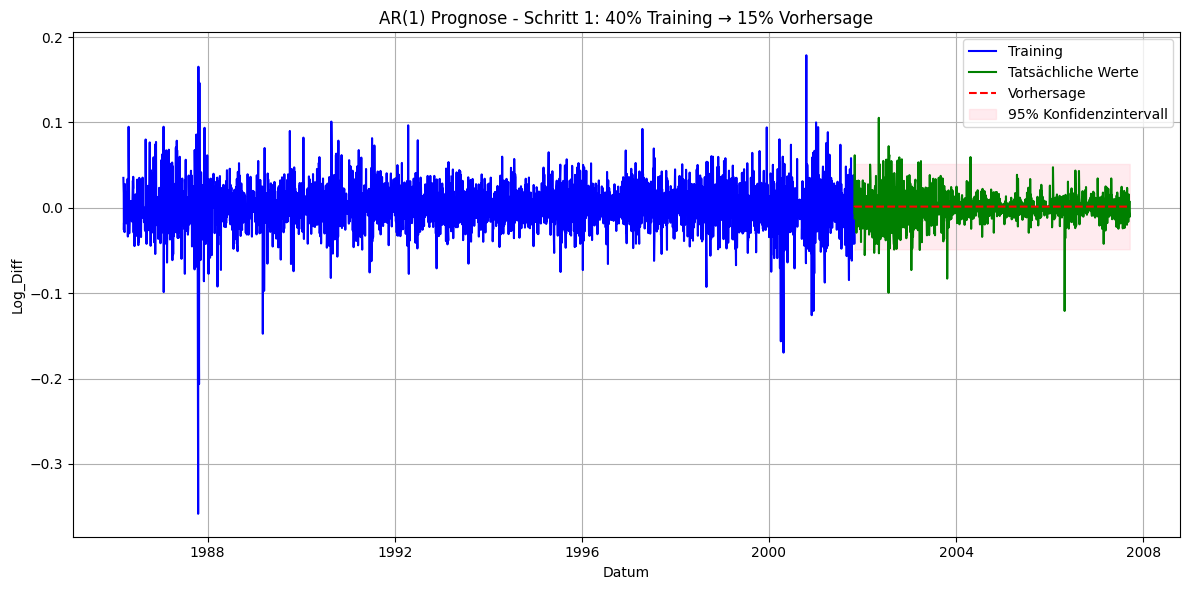


Schritt 2: 55% Training → 15% Vorhersage:
--------------------------------------------------------------------------------
Training: 5427 Datenpunkte
  Zeitraum: 1986-03-14 00:00:00 bis 2007-09-18 00:00:00
Test: 1480 Datenpunkte
  Zeitraum: 2007-09-19 00:00:00 bis 2013-08-05 00:00:00

Führe einfache Prognose durch...
Geschätzte AR(1) Parameter: Konstante = 0.001047, AR(1) = 0.023343

Vorhersagegenauigkeit:
MSE: 0.000393
RMSE: 0.019817
MAE: 0.013393


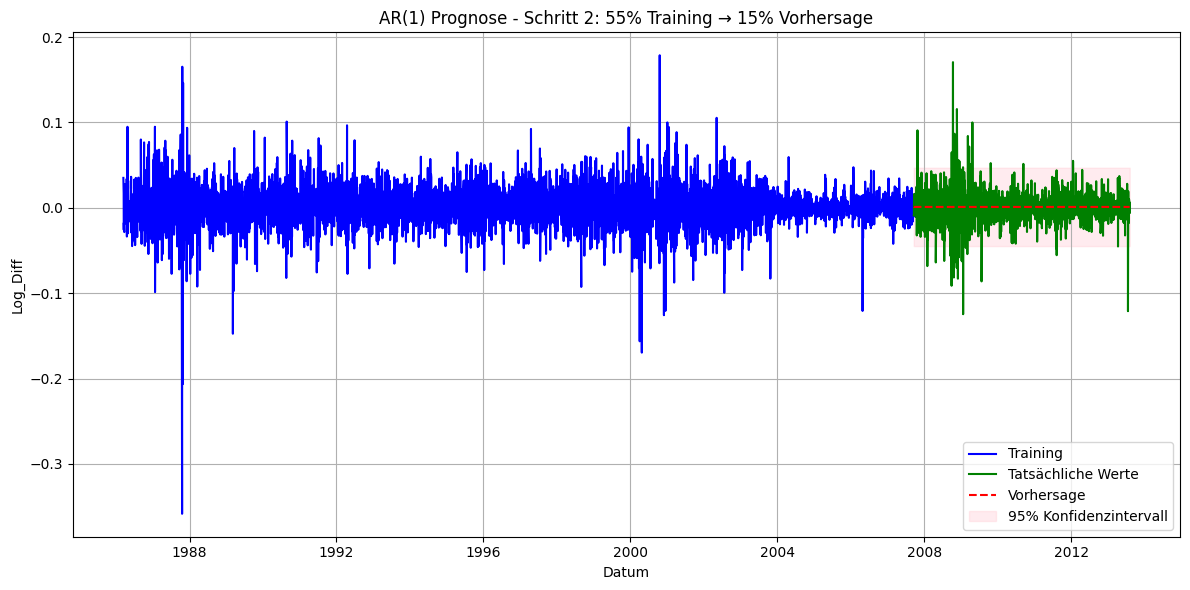


Schritt 3: 70% Training → 15% Vorhersage:
--------------------------------------------------------------------------------
Training: 6907 Datenpunkte
  Zeitraum: 1986-03-14 00:00:00 bis 2013-08-05 00:00:00
Test: 1480 Datenpunkte
  Zeitraum: 2013-08-06 00:00:00 bis 2019-06-21 00:00:00

Führe einfache Prognose durch...
Geschätzte AR(1) Parameter: Konstante = 0.000870, AR(1) = 0.006310

Vorhersagegenauigkeit:
MSE: 0.000212
RMSE: 0.014563
MAE: 0.010005


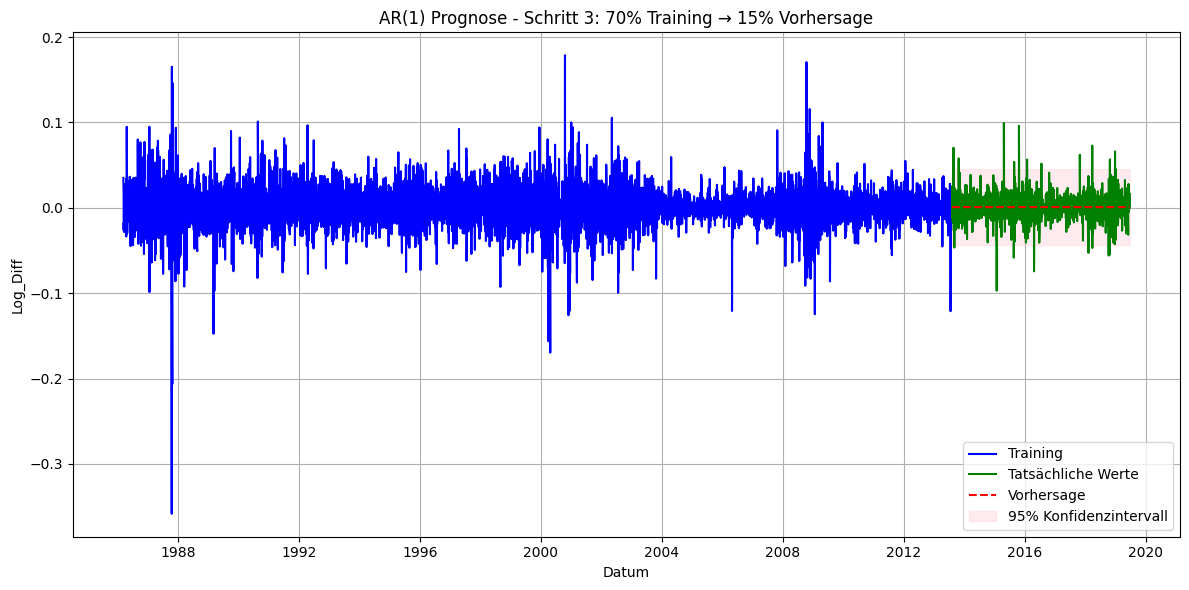


Schritt 4: 85% Training → 15% Vorhersage:
--------------------------------------------------------------------------------
Training: 8387 Datenpunkte
  Zeitraum: 1986-03-14 00:00:00 bis 2019-06-21 00:00:00
Test: 1480 Datenpunkte
  Zeitraum: 2019-06-24 00:00:00 bis 2025-05-12 00:00:00

Führe einfache Prognose durch...
Geschätzte AR(1) Parameter: Konstante = 0.000910, AR(1) = 0.002205

Vorhersagegenauigkeit:
MSE: 0.000352
RMSE: 0.018760
MAE: 0.013060


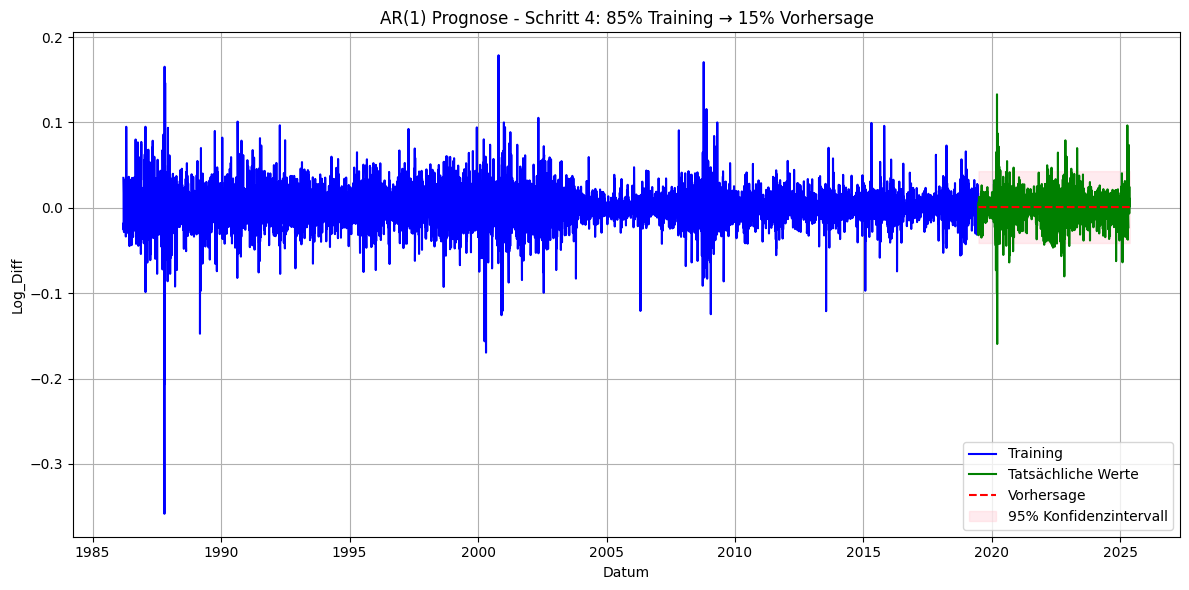


                   ZUSAMMENFASSUNG DER ROLLING WINDOW ANALYSE                   

Modellparameter in den verschiedenen Schritten:
Schritt 1: Konstante = 0.001375, AR(1) = 0.044094
Schritt 2: Konstante = 0.001047, AR(1) = 0.023343
Schritt 3: Konstante = 0.000870, AR(1) = 0.006310
Schritt 4: Konstante = 0.000910, AR(1) = 0.002205

Fehlermetriken:
Schritt    MSE             RMSE            MAE            
-------------------------------------------------------
         1        0.000273        0.016531        0.011392
         2        0.000393        0.019817        0.013393
         3        0.000212        0.014563        0.010005
         4        0.000352        0.018760        0.013060


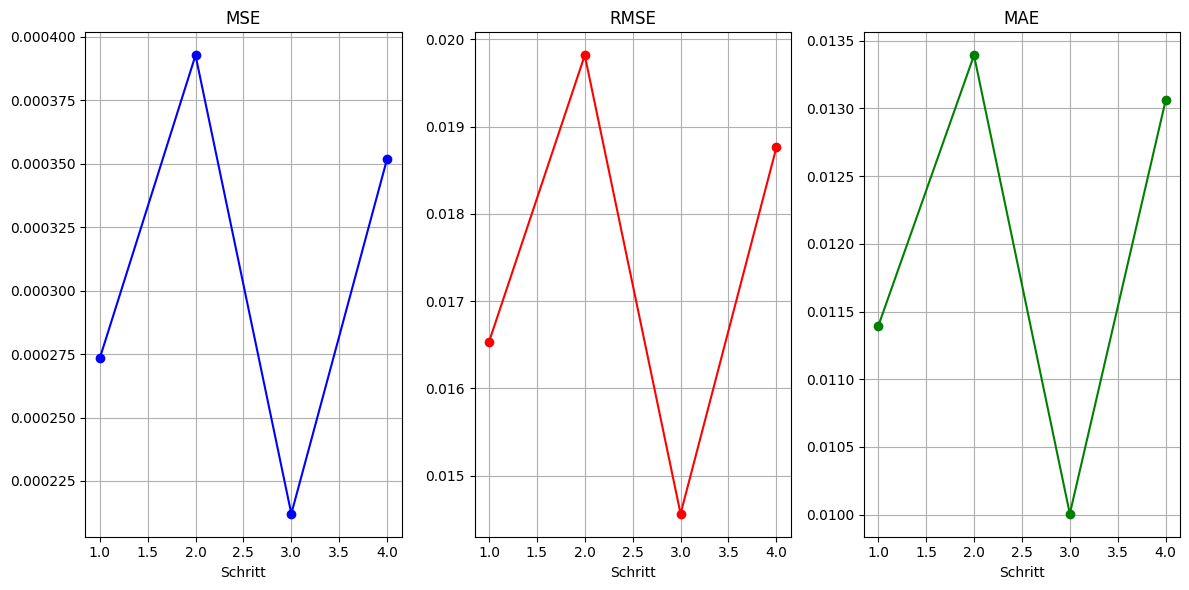


Lerneffekt des Modells:
Der AR(1)-Koeffizient ist relativ stabil über alle Schritte.

Entwicklung des AR(1)-Koeffizienten:
Schritt 1: 0.044094
Schritt 2: 0.023343
Schritt 3: 0.006310
Schritt 4: 0.002205

Die Vorhersagegenauigkeit hat sich im Laufe der Schritte verschlechtert.
Verschlechterung des RMSE vom ersten zum letzten Schritt: 13.49%

Hinweis:
Diese Analyse verwendet ein vereinfachtes AR(1)-Modell anstelle des vollständigen ARIMA-Modells.
Bei log-differenzierten Daten ist dies eine vernünftige Annäherung, da diese oft
einem weißen Rauschen oder einem einfachen AR-Prozess folgen.


In [11]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

def simple_rolling_forecasting(file_path, column='Log_Diff'):
    """
    Führt eine vereinfachte Rolling-Window-Prognose durch, ohne statsmodels zu verwenden.
    
    Args:
        file_path (str): Pfad zur CSV-Datei mit den log-differenzierten Daten
        column (str): Name der zu analysierenden Spalte (Standard: 'Log_Diff')
    
    Returns:
        dict: Ergebnisse der verschiedenen Rolling-Window-Schritte
    """
    # Laden der Daten
    print(f"Lade Daten aus: {file_path}")
    df = pd.read_csv(file_path)
    
    # Datum als Index setzen, falls vorhanden
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    
    # Überprüfen, ob die angegebene Spalte existiert
    if column not in df.columns:
        available_columns = ", ".join(df.columns)
        print(f"Warnung: Spalte '{column}' nicht gefunden. Verfügbare Spalten: {available_columns}")
        
        # Versuche, eine log-differenzierte Spalte zu finden
        if 'Log_Diff' in df.columns:
            column = 'Log_Diff'
            print(f"Verwende stattdessen Spalte '{column}'.")
        else:
            print("Keine log-differenzierte Spalte gefunden. Bitte stellen Sie sicher, dass die Daten korrekt vorbereitet wurden.")
            return None
    
    # NaN-Werte entfernen
    df = df.dropna(subset=[column])
    
    # Informationen zur Zeitreihe
    print(f"\nZeitreiheninformation:")
    print(f"Anzahl der Datenpunkte: {len(df)}")
    if isinstance(df.index, pd.DatetimeIndex):
        print(f"Zeitraum: {df.index.min()} bis {df.index.max()}")
    
    # Konfiguration der Rolling-Window-Schritte
    steps = [
        {"train_size": 0.40, "test_size": 0.15, "description": "Schritt 1: 40% Training → 15% Vorhersage"},
        {"train_size": 0.55, "test_size": 0.15, "description": "Schritt 2: 55% Training → 15% Vorhersage"},
        {"train_size": 0.70, "test_size": 0.15, "description": "Schritt 3: 70% Training → 15% Vorhersage"},
        {"train_size": 0.85, "test_size": 0.15, "description": "Schritt 4: 85% Training → 15% Vorhersage"}
    ]
    
    # Speichere die Ergebnisse
    results = {
        "steps": [],
        "metrics": {"mse": [], "rmse": [], "mae": []},
        "models": [],
        "forecasts": []
    }
    
    # Hauptanalyseablauf
    print("\n" + "="*80)
    print("ROLLING WINDOW PROGNOSE ANALYSE".center(80))
    print("="*80)
    
    # Iteriere über die definierten Schritte
    for i, step in enumerate(steps):
        print(f"\n{step['description']}:")
        print("-" * 80)
        
        # Berechne die Indizes für Training und Test
        total_points = len(df)
        train_end = int(total_points * step['train_size'])
        test_end = train_end + int(total_points * step['test_size'])
        
        # Extrahiere Trainings- und Testdaten
        train_data = df[column].iloc[:train_end]
        test_data = df[column].iloc[train_end:test_end]
        
        print(f"Training: {len(train_data)} Datenpunkte")
        if isinstance(df.index, pd.DatetimeIndex):
            print(f"  Zeitraum: {train_data.index.min()} bis {train_data.index.max()}")
        
        print(f"Test: {len(test_data)} Datenpunkte")
        if isinstance(df.index, pd.DatetimeIndex) and len(test_data) > 0:
            print(f"  Zeitraum: {test_data.index.min()} bis {test_data.index.max()}")
        
        # Einfaches Prognosemodell (Mittelwert + AR(1))
        print("\nFühre einfache Prognose durch...")
        
        # AR(1) Parameter manuell schätzen
        lag_values = train_data.shift(1).dropna()
        current_values = train_data.iloc[1:]
        
        X = lag_values.values.reshape(-1, 1)
        y = current_values.values
        
        # Lineare Regression für AR(1)-Koeffizienten
        from sklearn.linear_model import LinearRegression
        model = LinearRegression()
        model.fit(X, y)
        
        ar_coef = model.coef_[0]
        intercept = model.intercept_
        
        print(f"Geschätzte AR(1) Parameter: Konstante = {intercept:.6f}, AR(1) = {ar_coef:.6f}")
        
        # Vorhersage für Testzeitraum
        n_periods = len(test_data)
        forecast = np.zeros(n_periods)
        conf_width = 1.96 * np.std(model.predict(X) - y)  # 95% Konfidenzintervall
        
        # Erste Vorhersage basierend auf dem letzten Trainingswert
        last_value = train_data.iloc[-1]
        
        for j in range(n_periods):
            if j == 0:
                # Erste Vorhersage basiert auf dem letzten bekannten Wert
                forecast[j] = intercept + ar_coef * last_value
            else:
                # Nachfolgende Vorhersagen basieren auf vorherigen Vorhersagen
                forecast[j] = intercept + ar_coef * forecast[j-1]
        
        # Konfidenzintervalle
        lower_ci = forecast - conf_width
        upper_ci = forecast + conf_width
        
        # In DataFrame umwandeln
        forecast_series = pd.Series(forecast, index=test_data.index)
        lower_ci_series = pd.Series(lower_ci, index=test_data.index)
        upper_ci_series = pd.Series(upper_ci, index=test_data.index)
        
        # Berechne Fehlermetriken
        mse = mean_squared_error(test_data, forecast)
        rmse = math.sqrt(mse)
        mae = mean_absolute_error(test_data, forecast)
        
        print(f"\nVorhersagegenauigkeit:")
        print(f"MSE: {mse:.6f}")
        print(f"RMSE: {rmse:.6f}")
        print(f"MAE: {mae:.6f}")
        
        # Visualisiere die Ergebnisse
        plt.figure(figsize=(12, 6))
        
        # Trainingsdaten
        plt.plot(train_data.index, train_data, label='Training', color='blue')
        
        # Testdaten
        plt.plot(test_data.index, test_data, label='Tatsächliche Werte', color='green')
        
        # Vorhersage
        plt.plot(forecast_series.index, forecast_series, label='Vorhersage', color='red', linestyle='--')
        
        # Konfidenzintervall
        plt.fill_between(
            forecast_series.index,
            lower_ci_series,
            upper_ci_series,
            color='pink', alpha=0.3, label='95% Konfidenzintervall'
        )
        
        plt.title(f'AR(1) Prognose - {step["description"]}')
        plt.xlabel('Datum')
        plt.ylabel(column)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
        # Ergebnisse speichern
        results["metrics"]["mse"].append(mse)
        results["metrics"]["rmse"].append(rmse)
        results["metrics"]["mae"].append(mae)
        results["forecasts"].append({
            "test_data": test_data,
            "forecast": forecast_series,
            "lower_ci": lower_ci_series,
            "upper_ci": upper_ci_series
        })
        results["models"].append({"intercept": intercept, "ar_coef": ar_coef})
        
        # Schritt-Informationen speichern
        results["steps"].append({
            "train_size": step["train_size"],
            "test_size": step["test_size"],
            "train_points": len(train_data),
            "test_points": len(test_data)
        })
    
    # Zusammenfassung aller Schritte
    print("\n" + "="*80)
    print("ZUSAMMENFASSUNG DER ROLLING WINDOW ANALYSE".center(80))
    print("="*80)
    
    print("\nModellparameter in den verschiedenen Schritten:")
    for i, model_params in enumerate(results["models"]):
        print(f"Schritt {i+1}: Konstante = {model_params['intercept']:.6f}, AR(1) = {model_params['ar_coef']:.6f}")
    
    print("\nFehlermetriken:")
    print(f"{'Schritt':10} {'MSE':15} {'RMSE':15} {'MAE':15}")
    print("-" * 55)
    for i in range(len(steps)):
        mse = results["metrics"]["mse"][i]
        rmse = results["metrics"]["rmse"][i]
        mae = results["metrics"]["mae"][i]
        print(f"{i+1:10} {mse:15.6f} {rmse:15.6f} {mae:15.6f}")
    
    # Vergleich der Fehlermetriken über die Schritte
    plt.figure(figsize=(12, 6))
    
    x = list(range(1, len(steps) + 1))
    
    plt.subplot(1, 3, 1)
    plt.plot(x, results["metrics"]["mse"], 'o-', color='blue')
    plt.title('MSE')
    plt.xlabel('Schritt')
    plt.grid(True)
    
    plt.subplot(1, 3, 2)
    plt.plot(x, results["metrics"]["rmse"], 'o-', color='red')
    plt.title('RMSE')
    plt.xlabel('Schritt')
    plt.grid(True)
    
    plt.subplot(1, 3, 3)
    plt.plot(x, results["metrics"]["mae"], 'o-', color='green')
    plt.title('MAE')
    plt.xlabel('Schritt')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Lerneffekt des Modells
    print("\nLerneffekt des Modells:")
    ar_coefs = [model["ar_coef"] for model in results["models"]]
    if max(ar_coefs) - min(ar_coefs) < 0.1:
        print("Der AR(1)-Koeffizient ist relativ stabil über alle Schritte.")
    else:
        print("Der AR(1)-Koeffizient variiert zwischen den Schritten.")
    
    print("\nEntwicklung des AR(1)-Koeffizienten:")
    for i, model_params in enumerate(results["models"]):
        print(f"Schritt {i+1}: {model_params['ar_coef']:.6f}")
    
    # Überprüfe den Trend der Fehlermetriken
    if results["metrics"]["rmse"][0] > results["metrics"]["rmse"][-1]:
        improvement = (results["metrics"]["rmse"][0] - results["metrics"]["rmse"][-1]) / results["metrics"]["rmse"][0] * 100
        print(f"\nDie Vorhersagegenauigkeit hat sich im Laufe der Schritte verbessert.")
        print(f"Verbesserung des RMSE vom ersten zum letzten Schritt: {improvement:.2f}%")
    else:
        deterioration = (results["metrics"]["rmse"][-1] - results["metrics"]["rmse"][0]) / results["metrics"]["rmse"][0] * 100
        print(f"\nDie Vorhersagegenauigkeit hat sich im Laufe der Schritte verschlechtert.")
        print(f"Verschlechterung des RMSE vom ersten zum letzten Schritt: {deterioration:.2f}%")
    
    print("\nHinweis:")
    print("Diese Analyse verwendet ein vereinfachtes AR(1)-Modell anstelle des vollständigen ARIMA-Modells.")
    print("Bei log-differenzierten Daten ist dies eine vernünftige Annäherung, da diese oft")
    print("einem weißen Rauschen oder einem einfachen AR-Prozess folgen.")
    
    return results

# Beispielaufruf
if __name__ == "__main__":
    # Passe den Pfad zur CSV-Datei mit log-differenzierten Daten an
    file_path = "/Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/msft_aktien_daten_log_diff.csv"
    
    # Führe vereinfachte Rolling-Window-Analyse durch
    results = simple_rolling_forecasting(file_path, column='Log_Diff')

# ARMIA Modell

Lade Daten aus: /Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/msft_aktien_daten_log_diff.csv

Zeitreiheninformation:
Anzahl der Datenpunkte: 9868
Zeitraum: 1986-03-14 00:00:00 bis 2025-05-13 00:00:00

                          ROLLING WINDOW ARIMA ANALYSE                          

Schritt 1: 40% Training → 15% Vorhersage:
--------------------------------------------------------------------------------
Training: 3947 Datenpunkte
Test: 1480 Datenpunkte

Führe Grid-Suche für ARIMA-Parameter durch...
ARIMA(0,0,1) - AIC: -28954.47
ARIMA(1,0,0) - AIC: -28955.55
ARIMA(1,0,1) - AIC: -28953.55
ARIMA(2,0,0) - AIC: -28956.80
ARIMA(2,0,1) - AIC: -28954.80

Bestes ARIMA-Modell: ARIMA(2, 0, 0)
AIC: -28956.80

Vorhersagegenauigkeit:
MSE: 0.000273
RMSE: 0.016531
MAE: 0.011392


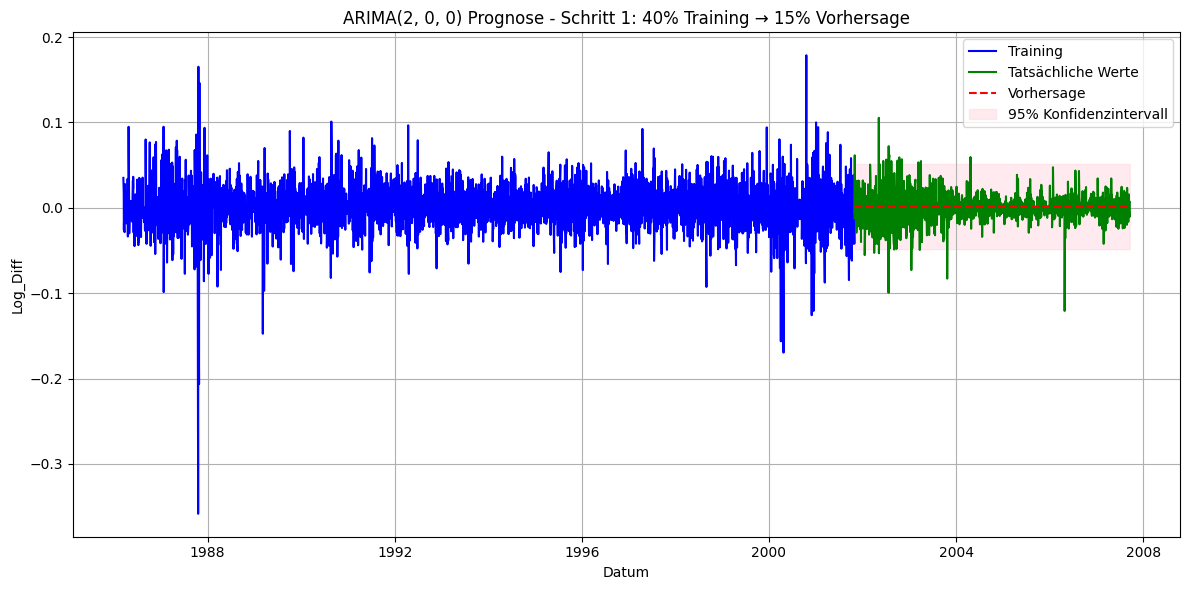


Schritt 2: 55% Training → 15% Vorhersage:
--------------------------------------------------------------------------------
Training: 5427 Datenpunkte
Test: 1480 Datenpunkte

Führe Grid-Suche für ARIMA-Parameter durch...
ARIMA(0,0,1) - AIC: -40749.18
ARIMA(1,0,0) - AIC: -40745.74
ARIMA(1,0,1) - AIC: -40743.74
ARIMA(2,0,0) - AIC: -40745.57
ARIMA(2,0,1) - AIC: -40743.57

Bestes ARIMA-Modell: ARIMA(0, 0, 1)
AIC: -40749.18

Vorhersagegenauigkeit:
MSE: 0.000393
RMSE: 0.019817
MAE: 0.013394


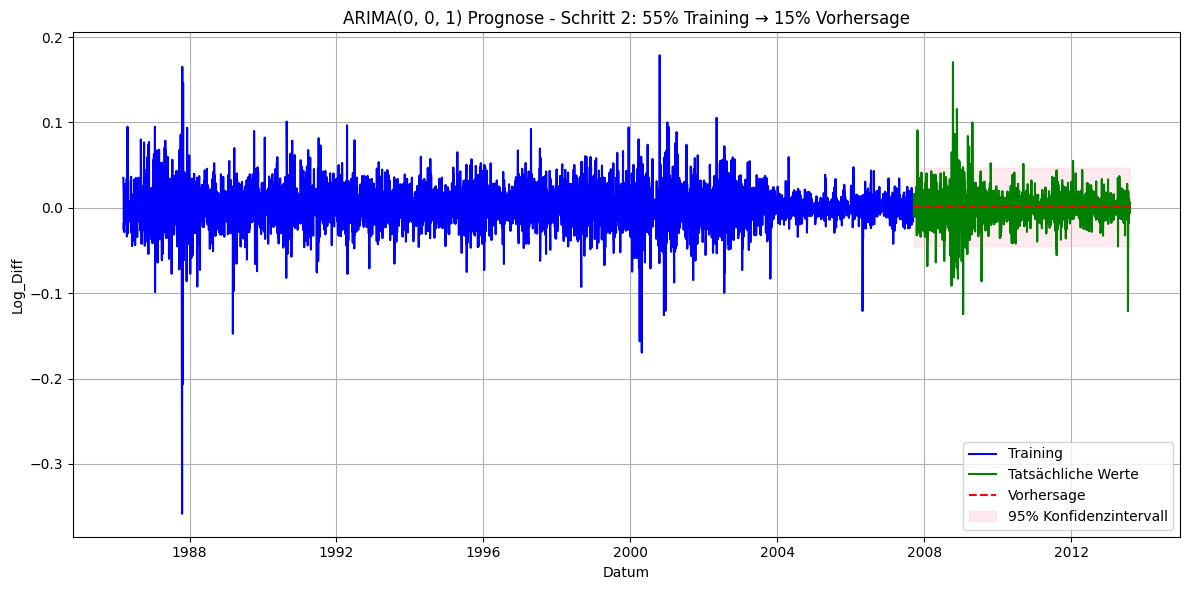


Schritt 3: 70% Training → 15% Vorhersage:
--------------------------------------------------------------------------------
Training: 6907 Datenpunkte
Test: 1480 Datenpunkte

Führe Grid-Suche für ARIMA-Parameter durch...
ARIMA(0,0,1) - AIC: -52296.02
ARIMA(1,0,0) - AIC: -52290.00
ARIMA(1,0,1) - AIC: -52288.00
ARIMA(2,0,0) - AIC: -52294.28
ARIMA(2,0,1) - AIC: -52292.28

Bestes ARIMA-Modell: ARIMA(0, 0, 1)
AIC: -52296.02

Vorhersagegenauigkeit:
MSE: 0.000212
RMSE: 0.014563
MAE: 0.010005


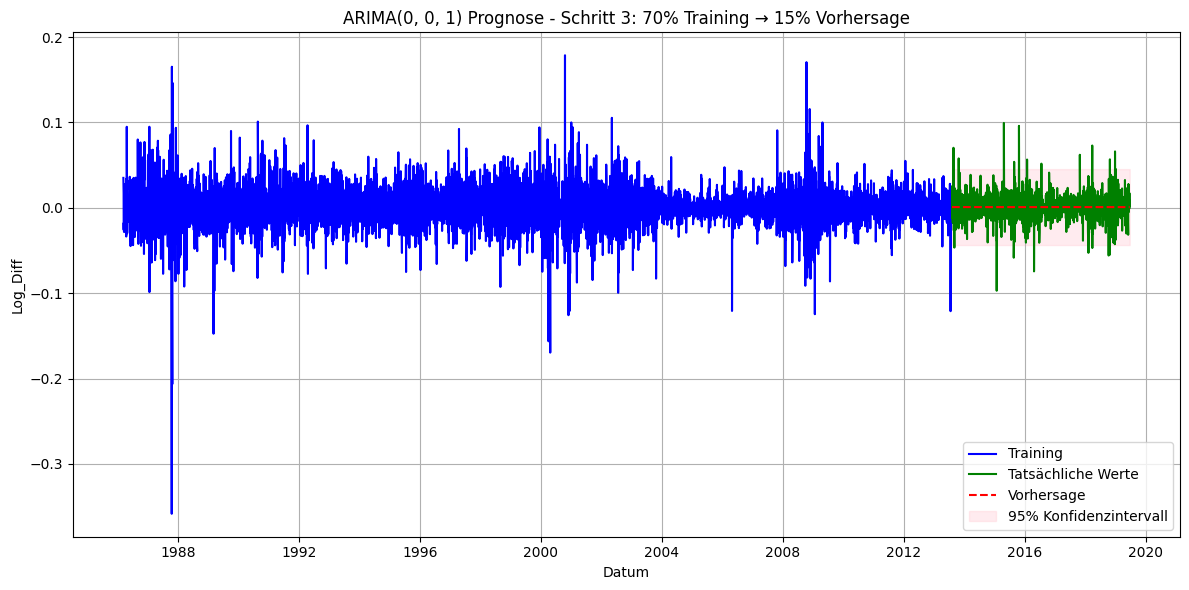


Schritt 4: 85% Training → 15% Vorhersage:
--------------------------------------------------------------------------------
Training: 8387 Datenpunkte
Test: 1480 Datenpunkte

Führe Grid-Suche für ARIMA-Parameter durch...
ARIMA(0,0,1) - AIC: -64421.31
ARIMA(1,0,0) - AIC: -64415.20
ARIMA(1,0,1) - AIC: -64413.20
ARIMA(2,0,0) - AIC: -64423.60
ARIMA(2,0,1) - AIC: -64421.60

Bestes ARIMA-Modell: ARIMA(2, 0, 0)
AIC: -64423.60

Vorhersagegenauigkeit:
MSE: 0.000352
RMSE: 0.018760
MAE: 0.013060


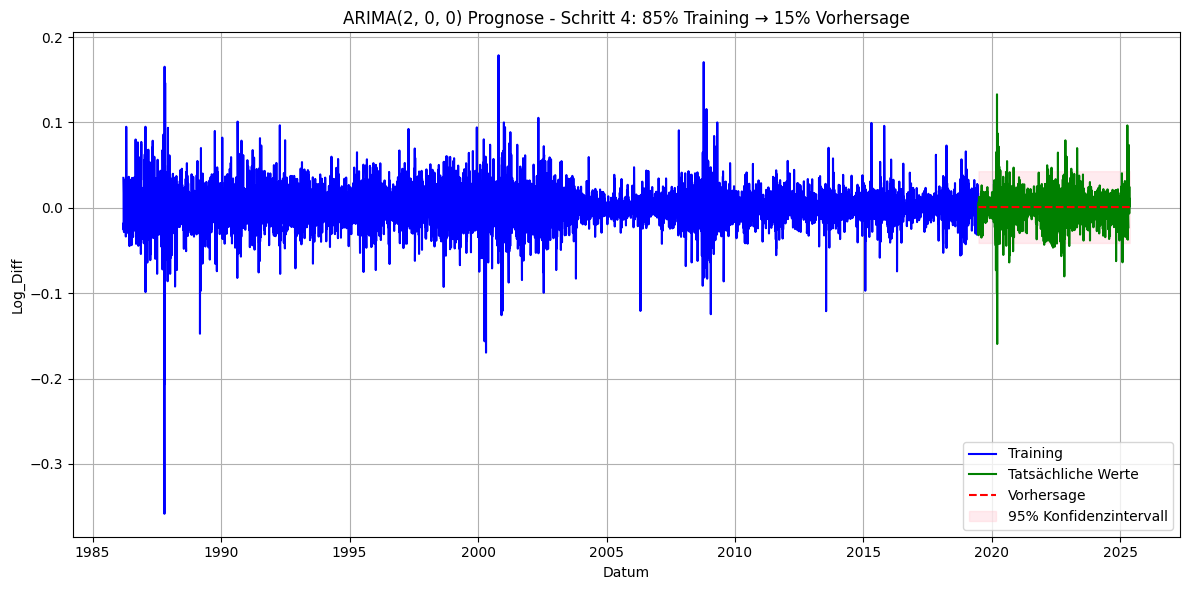


                   ZUSAMMENFASSUNG DER ROLLING WINDOW ANALYSE                   

ARIMA-Parameter in den verschiedenen Schritten:
Schritt 1: ARIMA(2, 0, 0)
Schritt 2: ARIMA(0, 0, 1)
Schritt 3: ARIMA(0, 0, 1)
Schritt 4: ARIMA(2, 0, 0)

Fehlermetriken:
Schritt    MSE             RMSE            MAE            
-------------------------------------------------------
         1        0.000273        0.016531        0.011392
         2        0.000393        0.019817        0.013394
         3        0.000212        0.014563        0.010005
         4        0.000352        0.018760        0.013060

Lerneffekt des Modells:
Das Modell hat in den verschiedenen Schritten unterschiedliche Parameter gewählt:
Schritt 1: ARIMA(2, 0, 0)
Schritt 2: ARIMA(0, 0, 1)
Schritt 3: ARIMA(0, 0, 1)
Schritt 4: ARIMA(2, 0, 0)


In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import math

class SimpleARIMA:
    """Eine einfache ARIMA(p,d,q)-Implementierung ohne statsmodels-Abhängigkeiten"""
    
    def __init__(self, p=1, d=0, q=1):
        self.p = p  # AR-Term
        self.d = d  # Differenzierungsgrad
        self.q = q  # MA-Term
        self.ar_coefs = None
        self.ma_coefs = None
        self.intercept = None
        self.resid = None
        self.fitted_values = None
    
    def _create_ar_features(self, y):
        """Erstellt AR-Features für die Regression"""
        n = len(y)
        X = np.zeros((n - self.p, self.p))
        for i in range(self.p):
            X[:, i] = y[self.p - i - 1:n - i - 1]
        return X
    
    def _difference(self, y, d=1):
        """Differenziert die Zeitreihe d-mal"""
        diff_y = y.copy()
        for _ in range(d):
            diff_y = np.diff(diff_y)
        return diff_y
    
    def _integrate(self, diff_y, original_y, d=1):
        """Integriert die differenzierte Zeitreihe zurück"""
        y = diff_y.copy()
        for i in range(d):
            y_prev = original_y[-d + i:][:len(y) + 1]
            y = np.cumsum(y) + y_prev[0]
        return y
    
    def fit(self, y):
        """Fittet das ARIMA-Modell an die Daten"""
        # Schritt 1: Differenzieren
        if self.d > 0:
            self.original_y = y.copy()
            y_diff = self._difference(y, self.d)
        else:
            y_diff = y.copy()
        
        # Schritt 2: AR-Modell fitten
        if self.p > 0:
            # AR-Features erstellen
            X_ar = self._create_ar_features(y_diff)
            y_ar = y_diff[self.p:]
            
            # Regression fitten
            model = LinearRegression()
            model.fit(X_ar, y_ar)
            
            # Koeffizienten speichern
            self.ar_coefs = model.coef_
            self.intercept = model.intercept_
            
            # Fitted values
            self.fitted_values = model.predict(X_ar)
            
            # Residuen berechnen
            self.resid = y_ar - self.fitted_values
        else:
            # Kein AR-Term
            self.intercept = np.mean(y_diff)
            self.ar_coefs = np.array([])
            self.fitted_values = np.repeat(self.intercept, len(y_diff) - self.p)
            self.resid = y_diff[self.p:] - self.fitted_values
        
        # Schritt 3: MA-Modell ist vereinfacht und ignoriert q
        # In einer vollständigen Implementierung würden wir hier auch MA-Terme modellieren
        self.ma_coefs = np.array([])
        
        return self
    
    def predict(self, n_steps):
        """Erstellt Vorhersagen für n_steps zukünftige Zeitpunkte"""
        # Vorbereitungen
        predictions = np.zeros(n_steps)
        
        if self.p > 0:
            # Die letzten p Werte als Ausgangspunkt nehmen
            if self.d > 0:
                y_diff = self._difference(self.original_y, self.d)
                last_values = y_diff[-self.p:]
            else:
                last_values = self.fitted_values[-self.p:]
        
            # Vorhersagen generieren
            for i in range(n_steps):
                # AR-Teil
                ar_pred = self.intercept
                for j in range(self.p):
                    if i - j >= 0:
                        # Verwende bereits generierte Vorhersagen
                        ar_pred += self.ar_coefs[j] * predictions[i - j - 1]
                    else:
                        # Verwende historische Werte
                        ar_pred += self.ar_coefs[j] * last_values[self.p - j - 1 - i]
                
                predictions[i] = ar_pred
        else:
            # Ohne AR-Term ist die Vorhersage einfach der Mittelwert
            predictions = np.repeat(self.intercept, n_steps)
        
        # Integration, falls differenziert wurde
        if self.d > 0:
            predictions = self._integrate(predictions, self.original_y, self.d)
        
        return predictions
    
    def get_aic(self):
        """Berechnet das AIC des Modells"""
        n = len(self.resid)
        k = self.p + self.q + 1  # Anzahl der Parameter
        ssr = np.sum(self.resid**2)
        aic = n * np.log(ssr/n) + 2 * k
        return aic

def simple_arima_rolling_window(file_path, column='Log_Diff', d=0):
    """
    Führt eine Rolling-Window-Analyse mit einer einfachen ARIMA-Implementierung durch.
    
    Args:
        file_path (str): Pfad zur CSV-Datei mit den log-differenzierten Daten
        column (str): Name der zu analysierenden Spalte (Standard: 'Log_Diff')
        d (int): Differenzierungsgrad für ARIMA (sollte 0 sein für bereits differenzierte Daten)
    
    Returns:
        dict: Ergebnisse der verschiedenen Rolling-Window-Schritte
    """
    # Daten laden
    print(f"Lade Daten aus: {file_path}")
    df = pd.read_csv(file_path)
    
    # Datum als Index setzen
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    
    # Überprüfen, ob die angegebene Spalte existiert
    if column not in df.columns:
        available_columns = ", ".join(df.columns)
        print(f"Warnung: Spalte '{column}' nicht gefunden. Verfügbare Spalten: {available_columns}")
        
        # Versuche, eine log-differenzierte Spalte zu finden
        if 'Log_Diff' in df.columns:
            column = 'Log_Diff'
            print(f"Verwende stattdessen Spalte '{column}'.")
        else:
            print("Keine log-differenzierte Spalte gefunden.")
            return None
    
    # NaN-Werte entfernen
    df = df.dropna(subset=[column])
    
    # Informationen zur Zeitreihe
    print(f"\nZeitreiheninformation:")
    print(f"Anzahl der Datenpunkte: {len(df)}")
    print(f"Zeitraum: {df.index.min()} bis {df.index.max()}")
    
    # Konfiguration der Rolling-Window-Schritte
    steps = [
        {"train_size": 0.40, "test_size": 0.15, "description": "Schritt 1: 40% Training → 15% Vorhersage"},
        {"train_size": 0.55, "test_size": 0.15, "description": "Schritt 2: 55% Training → 15% Vorhersage"},
        {"train_size": 0.70, "test_size": 0.15, "description": "Schritt 3: 70% Training → 15% Vorhersage"},
        {"train_size": 0.85, "test_size": 0.15, "description": "Schritt 4: 85% Training → 15% Vorhersage"}
    ]
    
    # ARIMA Parameter für Grid-Suche
    p_values = [0, 1, 2]  # AR Parameter
    q_values = [0, 1]     # MA Parameter (vereinfacht)
    
    # Speichere die Ergebnisse
    results = {
        "steps": [],
        "metrics": {"mse": [], "rmse": [], "mae": []},
        "models": [],
        "best_params": [],
        "forecasts": []
    }
    
    # Hauptanalyseablauf
    print("\n" + "="*80)
    print("ROLLING WINDOW ARIMA ANALYSE".center(80))
    print("="*80)
    
    # Iteriere über die definierten Schritte
    for i, step in enumerate(steps):
        print(f"\n{step['description']}:")
        print("-" * 80)
        
        # Berechne die Indizes für Training und Test
        total_points = len(df)
        train_end = int(total_points * step['train_size'])
        test_end = train_end + int(total_points * step['test_size'])
        
        # Extrahiere Trainings- und Testdaten
        train_data = df[column].iloc[:train_end].values
        test_data = df[column].iloc[train_end:test_end]
        
        print(f"Training: {len(train_data)} Datenpunkte")
        print(f"Test: {len(test_data)} Datenpunkte")
        
        # Grid-Suche für ARIMA-Parameter
        print("\nFühre Grid-Suche für ARIMA-Parameter durch...")
        
        best_model = None
        best_aic = float('inf')
        best_params = None
        
        for p in p_values:
            for q in q_values:
                if p == 0 and q == 0:
                    continue  # Überspringe nicht-informative Modelle
                
                try:
                    # Modell initialisieren und fitten
                    model = SimpleARIMA(p=p, d=d, q=q)
                    model.fit(train_data)
                    
                    # AIC berechnen
                    aic = model.get_aic()
                    
                    print(f"ARIMA({p},{d},{q}) - AIC: {aic:.2f}")
                    
                    # Bestes Modell speichern
                    if aic < best_aic:
                        best_aic = aic
                        best_model = model
                        best_params = (p, d, q)
                except Exception as e:
                    print(f"ARIMA({p},{d},{q}) - Fehler: {str(e)[:50]}...")
                    continue
        
        # Wenn kein Modell gefunden wurde
        if best_model is None:
            print("Konnte kein passendes ARIMA-Modell finden.")
            results["metrics"]["mse"].append(None)
            results["metrics"]["rmse"].append(None)
            results["metrics"]["mae"].append(None)
            results["forecasts"].append(None)
            results["best_params"].append(None)
            results["models"].append(None)
            continue
        
        print(f"\nBestes ARIMA-Modell: ARIMA{best_params}")
        print(f"AIC: {best_aic:.2f}")
        
        # Vorhersage für Testzeitraum
        n_periods = len(test_data)
        if n_periods > 0:
            forecast = best_model.predict(n_periods)
            
            # Manuell Konfidenzintervall berechnen
            resid_std = np.std(best_model.resid)
            conf_width = 1.96 * resid_std
            lower_ci = forecast - conf_width
            upper_ci = forecast + conf_width
            
            # In Series umwandeln
            forecast_series = pd.Series(forecast, index=test_data.index)
            lower_ci_series = pd.Series(lower_ci, index=test_data.index)
            upper_ci_series = pd.Series(upper_ci, index=test_data.index)
            
            # Berechne Fehlermetriken
            mse = mean_squared_error(test_data, forecast_series)
            rmse = math.sqrt(mse)
            mae = mean_absolute_error(test_data, forecast_series)
            
            print(f"\nVorhersagegenauigkeit:")
            print(f"MSE: {mse:.6f}")
            print(f"RMSE: {rmse:.6f}")
            print(f"MAE: {mae:.6f}")
            
            # Visualisiere die Ergebnisse
            plt.figure(figsize=(12, 6))
            
            # Trainingsdaten
            plt.plot(df[column].iloc[:train_end].index, df[column].iloc[:train_end], 
                     label='Training', color='blue')
            
            # Testdaten
            plt.plot(test_data.index, test_data, label='Tatsächliche Werte', color='green')
            
            # Vorhersage
            plt.plot(forecast_series.index, forecast_series, 
                     label='Vorhersage', color='red', linestyle='--')
            
            # Konfidenzintervall
            plt.fill_between(
                forecast_series.index,
                lower_ci_series,
                upper_ci_series,
                color='pink', alpha=0.3, label='95% Konfidenzintervall'
            )
            
            plt.title(f'ARIMA{best_params} Prognose - {step["description"]}')
            plt.xlabel('Datum')
            plt.ylabel(column)
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
            
            # Ergebnisse speichern
            results["metrics"]["mse"].append(mse)
            results["metrics"]["rmse"].append(rmse)
            results["metrics"]["mae"].append(mae)
            results["forecasts"].append({
                "test_data": test_data,
                "forecast": forecast_series,
                "lower_ci": lower_ci_series,
                "upper_ci": upper_ci_series
            })
        else:
            print("Warnung: Keine Testdaten für die Vorhersage verfügbar.")
            results["metrics"]["mse"].append(None)
            results["metrics"]["rmse"].append(None)
            results["metrics"]["mae"].append(None)
            results["forecasts"].append(None)
        
        # Modell und Parameter speichern
        results["best_params"].append(best_params)
        results["models"].append(best_model)
        
        # Schritt-Informationen speichern
        results["steps"].append({
            "train_size": step["train_size"],
            "test_size": step["test_size"],
            "train_points": len(train_data),
            "test_points": len(test_data)
        })
    
    # Zusammenfassung aller Schritte
    print("\n" + "="*80)
    print("ZUSAMMENFASSUNG DER ROLLING WINDOW ANALYSE".center(80))
    print("="*80)
    
    print("\nARIMA-Parameter in den verschiedenen Schritten:")
    for i, params in enumerate(results["best_params"]):
        if params is not None:
            print(f"Schritt {i+1}: ARIMA{params}")
        else:
            print(f"Schritt {i+1}: Kein gültiges Modell")
    
    # Fehlermetriken
    valid_metrics = [i for i, m in enumerate(results["metrics"]["mse"]) if m is not None]
    if valid_metrics:
        print("\nFehlermetriken:")
        print(f"{'Schritt':10} {'MSE':15} {'RMSE':15} {'MAE':15}")
        print("-" * 55)
        for i in valid_metrics:
            mse = results["metrics"]["mse"][i]
            rmse = results["metrics"]["rmse"][i]
            mae = results["metrics"]["mae"][i]
            print(f"{i+1:10} {mse:15.6f} {rmse:15.6f} {mae:15.6f}")
    
    # Lerneffekt des Modells
    valid_params = [p for p in results["best_params"] if p is not None]
    if valid_params:
        print("\nLerneffekt des Modells:")
        if len(set(tuple(p) for p in valid_params)) == 1:
            print(f"Das Modell hat konsistente Parameter über alle Schritte hinweg: ARIMA{valid_params[0]}")
        else:
            print("Das Modell hat in den verschiedenen Schritten unterschiedliche Parameter gewählt:")
            for i, params in enumerate([p for i, p in enumerate(results["best_params"]) if p is not None]):
                print(f"Schritt {valid_metrics[i]+1}: ARIMA{params}")
    
    return results

# Beispielaufruf
if __name__ == "__main__":
    # Passe den Pfad zur CSV-Datei mit log-differenzierten Daten an
    file_path = "/Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/msft_aktien_daten_log_diff.csv"
    
    # Führe ARIMA mit Rolling-Window-Methode durch
    results = simple_arima_rolling_window(file_path, column='Log_Diff', d=0)

## Forecast mit ARIMA-Modell

Lade Daten aus: /Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/msft_aktien_daten_log_diff.csv
Erstelle ARIMA(2,0,0) Prognose für 1480 zukünftige Perioden
AR-Koeffizienten: [-0.01840265 -0.03873206]
Intercept: 0.000951014464665616
AR(2) Stabilitätsbedingung erfüllt: True


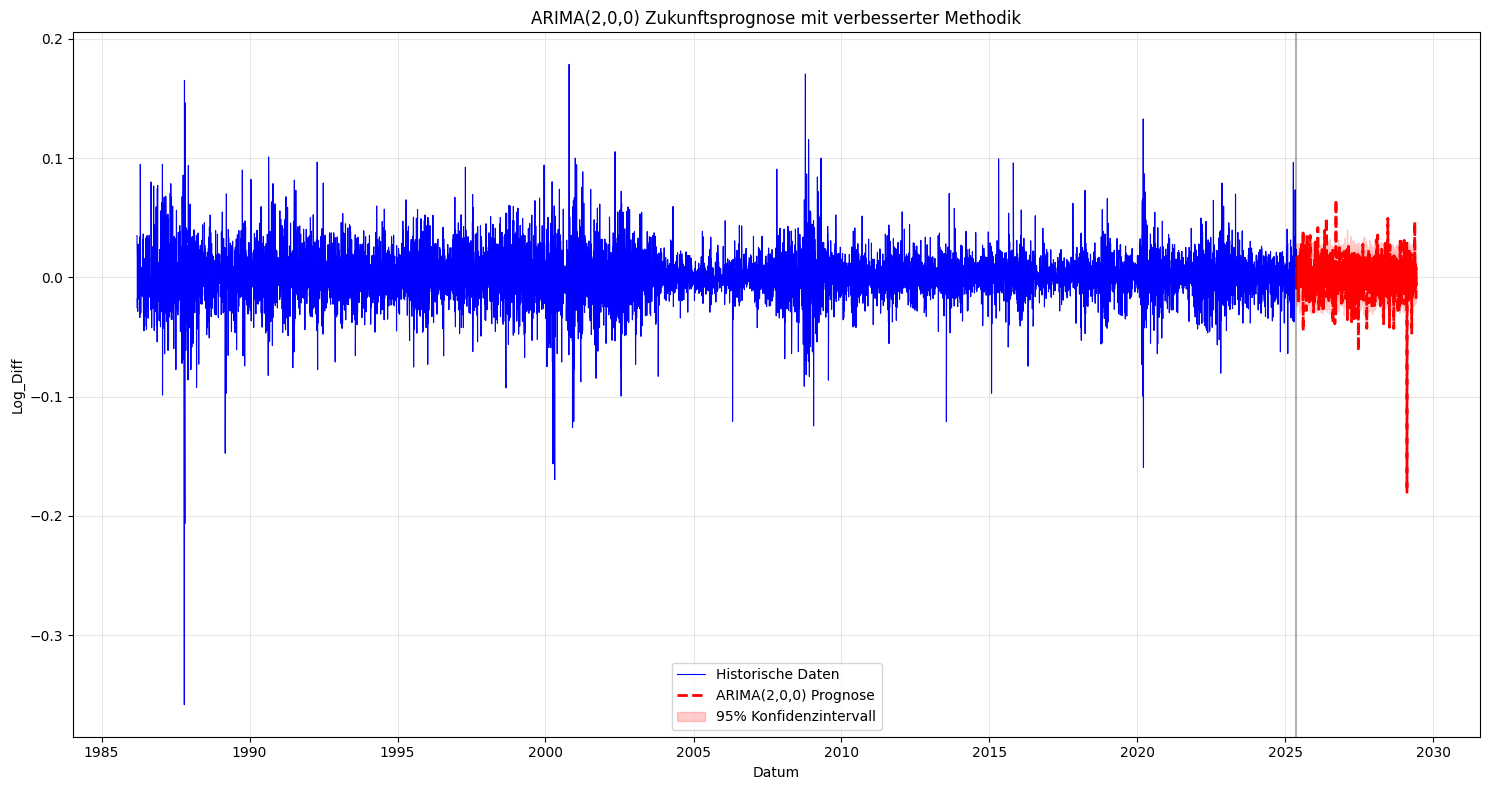

Vorhersage als CSV exportiert: /Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/arima_forecast.csv
Modellparameter als CSV exportiert: /Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/arima_model_info.csv

Fertig! Alle Daten wurden erfolgreich exportiert.
Prognosedaten: /Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/arima_forecast.csv


In [32]:
# Import der benötigten Bibliotheken
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math
import os
import csv
from datetime import datetime, timedelta

# Die verbesserte ARIMA-Klasse
class EnhancedSimpleARIMA:
    """Eine verbesserte einfache ARIMA(p,d,q)-Implementierung"""
    
    def __init__(self, p=1, d=0, q=1):
        self.p = p  # AR-Term
        self.d = d  # Differenzierungsgrad
        self.q = q  # MA-Term
        self.ar_coefs = None
        self.ma_coefs = None
        self.intercept = None
        self.resid = None
        self.fitted_values = None
        self.original_y = None
    
    def _create_ar_features(self, y):
        """Erstellt AR-Features für die Regression"""
        n = len(y)
        X = np.zeros((n - self.p, self.p))
        for i in range(self.p):
            X[:, i] = y[self.p - i - 1:n - i - 1]
        return X
    
    def _create_ma_features(self, resid):
        """Erstellt MA-Features für die Regression"""
        n = len(resid)
        X = np.zeros((n - self.q, self.q))
        for i in range(self.q):
            X[:, i] = resid[self.q - i - 1:n - i - 1]
        return X
    
    def _difference(self, y, d=1):
        """Differenziert die Zeitreihe d-mal"""
        diff_y = y.copy()
        for _ in range(d):
            diff_y = np.diff(diff_y)
        return diff_y
    
    def _integrate(self, diff_y, original_y, d=1):
        """Integriert die differenzierte Zeitreihe zurück"""
        y = diff_y.copy()
        for i in range(d):
            y_prev = original_y[-d + i:][:len(y) + 1]
            y = np.cumsum(y) + y_prev[0]
        return y
    
    def fit(self, y):
        """Fittet das ARIMA-Modell an die Daten mit verbesserter Schätzung"""
        # Original-Daten speichern
        self.original_y = y.copy()
        
        # Schritt 1: Differenzieren
        if self.d > 0:
            y_diff = self._difference(y, self.d)
        else:
            y_diff = y.copy()
        
        # Schritt 2: AR-Modell fitten
        if self.p > 0:
            # AR-Features erstellen
            X_ar = self._create_ar_features(y_diff)
            y_ar = y_diff[self.p:]
            
            # Regression fitten
            ar_model = LinearRegression()
            ar_model.fit(X_ar, y_ar)
            
            # Koeffizienten speichern
            self.ar_coefs = ar_model.coef_
            self.intercept = ar_model.intercept_
            
            # Fitted values
            ar_fitted = ar_model.predict(X_ar)
            
            # Residuen berechnen
            ar_resid = y_ar - ar_fitted
        else:
            # Kein AR-Term
            self.intercept = np.mean(y_diff)
            self.ar_coefs = np.array([])
            ar_fitted = np.repeat(self.intercept, len(y_diff) - self.p)
            ar_resid = y_diff[self.p:] - ar_fitted
        
        # Schritt 3: MA-Modell fitten (wenn q > 0)
        if self.q > 0:
            # Initialisiere leere Residuen für die ersten q Zeitpunkte
            full_resid = np.zeros(len(y_diff))
            full_resid[self.p:] = ar_resid
            
            # MA-Features erstellen
            X_ma = np.zeros((len(ar_resid) - self.q, self.q))
            for i in range(self.q):
                X_ma[:, i] = full_resid[self.p + i:len(full_resid) - self.q + i]
            
            # MA-Target
            y_ma = ar_resid[self.q:]
            
            # Regression fitten
            ma_model = LinearRegression(fit_intercept=False)
            ma_model.fit(X_ma, y_ma)
            
            # MA-Koeffizienten speichern
            self.ma_coefs = ma_model.coef_
            
            # MA-fitted values
            ma_fitted = ma_model.predict(X_ma)
            
            # Finale fitted values
            self.fitted_values = np.zeros(len(ar_fitted))
            self.fitted_values[:len(ar_fitted) - self.q] = ar_fitted[:len(ar_fitted) - self.q] + ma_fitted
            self.fitted_values[len(ar_fitted) - self.q:] = ar_fitted[len(ar_fitted) - self.q:]
            
            # Finale Residuen
            self.resid = y_diff[self.p:] - self.fitted_values
        else:
            self.ma_coefs = np.array([])
            self.fitted_values = ar_fitted
            self.resid = ar_resid
        
        return self
    
    def predict(self, n_steps, include_noise=True):
        """Erstellt Vorhersagen für n_steps zukünftige Zeitpunkte mit optionalem Rauschen"""
        # Vorbereitungen
        predictions = np.zeros(n_steps)
        
        # Für AR-Komponente
        if self.p > 0:
            # Die letzten p Werte als Ausgangspunkt nehmen
            if self.d > 0:
                y_diff = self._difference(self.original_y, self.d)
                last_values = y_diff[-self.p:]
            else:
                last_values = self.original_y[-self.p:]
            
            # Für MA-Komponente: Letzte q Residuen
            if self.q > 0:
                last_resid = self.resid[-self.q:]
            
            # Vorhersagen generieren
            for i in range(n_steps):
                # AR-Teil
                pred = self.intercept
                for j in range(self.p):
                    if i - j >= 0:
                        # Verwende bereits generierte Vorhersagen
                        pred += self.ar_coefs[j] * predictions[i - j - 1]
                    else:
                        # Verwende historische Werte
                        pred += self.ar_coefs[j] * last_values[self.p - j - 1 - i]
                
                # MA-Teil
                if self.q > 0:
                    for j in range(self.q):
                        if i - j - 1 >= 0:
                            # Verwende Fehler der Vorhersage
                            innovation = predictions[i - j - 1] - (predictions[i - j - 1] if i - j - 1 >= 0 else last_values[self.p - (i - j - 1) - 1])
                            pred += self.ma_coefs[j] * innovation
                        else:
                            # Verwende historische Fehler
                            pred += self.ma_coefs[j] * last_resid[self.q - j - 1 - i]
                
                # Füge optional Rauschen hinzu
                if include_noise and len(self.resid) > 0:
                    # Bootstrapping: Zufällige Auswahl aus historischen Residuen
                    noise = np.random.choice(self.resid)
                    # Dämpfe das Rauschen, um übermäßige Volatilität zu vermeiden
                    noise_scale = 0.5  # Zwischen 0 und 1 anpassen
                    pred += noise * noise_scale
                
                predictions[i] = pred
        else:
            # Ohne AR-Term ist die Vorhersage der Mittelwert plus optional MA und Rauschen
            predictions = np.repeat(self.intercept, n_steps)
            
            # MA-Teil für ein reines MA-Modell ist komplexer und hier vereinfacht
            
            # Füge optional Rauschen hinzu
            if include_noise and len(self.resid) > 0:
                noise = np.random.choice(self.resid, size=n_steps)
                noise_scale = 0.5  # Zwischen 0 und 1 anpassen
                predictions += noise * noise_scale
        
        # Integration, falls differenziert wurde
        if self.d > 0:
            predictions = self._integrate(predictions, self.original_y, self.d)
        
        return predictions
    
    def get_aic(self):
        """Berechnet das AIC des Modells"""
        if self.resid is None:
            return float('inf')
        
        n = len(self.resid)
        k = self.p + self.q + (1 if self.intercept is not None else 0)  # Anzahl der Parameter
        ssr = np.sum(self.resid**2)
        
        # Vermeiden von Division durch Null oder negativen Werten
        if n <= k or ssr <= 0:
            return float('inf')
        
        aic = n * np.log(ssr/n) + 2 * k
        return aic

# Die Funktion für die verbesserte ARIMA(2,0,0) Vorhersage mit CSV-Export
def improved_ar2_forecast_with_export(file_path, output_dir, column='Log_Diff', forecast_periods=None, include_noise=True):
    """
    Verbesserte Funktion zur Vorhersage mit ARIMA(2,0,0) und Export der Ergebnisse als CSV.
    
    Args:
        file_path (str): Pfad zur CSV-Datei mit den log-differenzierten Daten
        output_dir (str): Verzeichnis für den Export der CSV-Dateien
        column (str): Name der zu analysierenden Spalte
        forecast_periods (int): Anzahl der Perioden für die Vorhersage
        include_noise (bool): Ob Rauschen in die Vorhersage einbezogen werden soll
    
    Returns:
        dict: Die Vorhersagewerte für den zukünftigen Zeitraum
    """
    # Daten laden
    print(f"Lade Daten aus: {file_path}")
    df = pd.read_csv(file_path)
    
    # Datum als Index setzen
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    
    # Überprüfen der Spalte
    if column not in df.columns:
        available_columns = ", ".join(df.columns)
        print(f"Warnung: Spalte '{column}' nicht gefunden. Verfügbare Spalten: {available_columns}")
        
        # Versuche, eine log-differenzierte Spalte zu finden
        if 'Log_Diff' in df.columns:
            column = 'Log_Diff'
            print(f"Verwende stattdessen Spalte '{column}'.")
        else:
            print("Keine log-differenzierte Spalte gefunden.")
            return None
    
    # NaN-Werte entfernen
    df = df.dropna(subset=[column])
    
    # Bestimme die Anzahl der Vorhersageperioden
    if forecast_periods is None:
        forecast_periods = int(len(df) * 0.15)
    
    print(f"Erstelle ARIMA(2,0,0) Prognose für {forecast_periods} zukünftige Perioden")
    
    # Daten vorbereiten
    data = df[column].values
    
    # Verbesserte ARIMA-Klasse verwenden
    model = EnhancedSimpleARIMA(p=2, d=0, q=0)
    model.fit(data)
    
    # AR-Koeffizienten anzeigen
    print(f"AR-Koeffizienten: {model.ar_coefs}")
    print(f"Intercept: {model.intercept}")
    
    # Stabilität der AR-Parameter prüfen
    if len(model.ar_coefs) == 2:
        ar1, ar2 = model.ar_coefs
        stability_condition = (ar1 + ar2 < 1) and (ar2 - ar1 < 1) and (abs(ar2) < 1)
        print(f"AR(2) Stabilitätsbedingung erfüllt: {stability_condition}")
        
        if not stability_condition:
            print("Warnung: AR(2) Koeffizienten könnten zu Instabilität führen!")
    
    # Vorhersage für zukünftige Perioden mit optionalem Rauschen
    future_forecast = model.predict(forecast_periods, include_noise=include_noise)
    
    # Wir erstellen mehrere Vorhersagen für das Konfidenzintervall
    num_simulations = 200
    all_forecasts = np.zeros((num_simulations, forecast_periods))
    
    for i in range(num_simulations):
        all_forecasts[i, :] = model.predict(forecast_periods, include_noise=True)
    
    # Konfidenzintervalle aus den Simulationen berechnen
    lower_ci = np.percentile(all_forecasts, 2.5, axis=0)  # 2.5% Quantil
    upper_ci = np.percentile(all_forecasts, 97.5, axis=0)  # 97.5% Quantil
    
    # Datums-Index für die Vorhersage erstellen
    last_date = df.index[-1]
    future_dates = []
    
    if isinstance(last_date, pd.Timestamp):
        # Berechne die durchschnittliche Zeitdifferenz
        date_diffs = []
        for i in range(1, len(df)):
            date_diffs.append((df.index[i] - df.index[i-1]).days)
        avg_diff_days = int(np.mean(date_diffs))
        if avg_diff_days == 0:  # Falls tägliche Daten
            avg_diff_days = 1
        
        # Generiere zukünftige Daten als Strings
        current_date = last_date
        for i in range(forecast_periods):
            current_date = current_date + pd.Timedelta(days=avg_diff_days)
            future_dates.append(current_date.strftime('%Y-%m-%d'))
    else:
        # Wenn kein Datum vorhanden ist, nutze numerische Indizes
        future_dates = [f"t+{i+1}" for i in range(forecast_periods)]
    
    # Visualisierung
    plt.figure(figsize=(15, 8))
    
    # Historische Daten
    plt.plot(df.index, df[column], label='Historische Daten', color='blue', linewidth=0.8)
    
    # Da wir keine pandas Series mit Datumsindex nutzen,
    # müssen wir die Zeitachse für die Vorhersage manuell erstellen
    future_x = [pd.Timestamp(d) for d in future_dates]
    
    # Vorhersage
    plt.plot(future_x, future_forecast, 
             label='ARIMA(2,0,0) Prognose', color='red', 
             linestyle='--', linewidth=2)
    
    # Konfidenzintervall
    plt.fill_between(
        future_x,
        lower_ci,
        upper_ci,
        color='red', alpha=0.2, label='95% Konfidenzintervall'
    )
    
    # Trennlinie
    plt.axvline(x=last_date, color='black', linestyle='-', alpha=0.3)
    
    plt.title('ARIMA(2,0,0) Zukunftsprognose mit verbesserter Methodik')
    plt.xlabel('Datum')
    plt.ylabel(column)
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Stelle sicher, dass das Ausgabeverzeichnis existiert
    os.makedirs(output_dir, exist_ok=True)
    
    # MANUELLER CSV-EXPORT ohne pandas to_csv (vermeidet den Fehler)
    csv_path = os.path.join(output_dir, 'arima_forecast.csv')
    
    # Mit dem csv-Modul direkt in die Datei schreiben
    with open(csv_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        # Schreibe Header
        writer.writerow(['Date', 'Forecast', 'Lower_CI', 'Upper_CI'])
        # Schreibe Daten
        for i in range(len(future_forecast)):
            writer.writerow([
                future_dates[i], 
                future_forecast[i], 
                lower_ci[i], 
                upper_ci[i]
            ])
    
    print(f"Vorhersage als CSV exportiert: {csv_path}")
    
    # Erstelle eine Datei mit den Modellparametern
    model_info_path = os.path.join(output_dir, 'arima_model_info.csv')
    with open(model_info_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Parameter', 'Wert'])
        writer.writerow(['p', 2])
        writer.writerow(['d', 0])
        writer.writerow(['q', 0])
        writer.writerow(['AR-Koeffizient 1', model.ar_coefs[0]])
        writer.writerow(['AR-Koeffizient 2', model.ar_coefs[1]])
        writer.writerow(['Intercept', model.intercept])
        writer.writerow(['AIC', model.get_aic()])
    
    print(f"Modellparameter als CSV exportiert: {model_info_path}")
    
    return {
        "forecast": future_forecast,
        "lower_ci": lower_ci,
        "upper_ci": upper_ci,
        "dates": future_dates,
        "model": model,
        "csv_path": csv_path
    }

# Hauptaufruf mit CSV-Export
def main_export_csv():
    # Pfade zu den Daten - passen Sie diese an Ihre Dateipfade an
    log_diff_file = "/Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/msft_aktien_daten_log_diff.csv"
    
    # Ausgabeverzeichnis für CSV-Export
    output_dir = "/Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data"
    
    # ARIMA(2,0,0) Zukunftsprognose mit CSV-Export
    forecast_results = improved_ar2_forecast_with_export(
        file_path=log_diff_file, 
        output_dir=output_dir,
        column='Log_Diff', 
        forecast_periods=None,  # Standardmäßig 15% der Datenlänge
        include_noise=True  # Mit Rauschen für realistischere Prognosen
    )
    
    if forecast_results is not None:
        print(f"\nFertig! Alle Daten wurden erfolgreich exportiert.")
        print(f"Prognosedaten: {forecast_results['csv_path']}")

# Ausführen des Hauptprogramms mit CSV-Export
if __name__ == "__main__":
    main_export_csv()

## Kombinieren von Log Diff- und Forecastdaten

In [36]:
import pandas as pd
import numpy as np
import csv
import os
from datetime import datetime

def create_unified_dataset(log_diff_file, forecast_file, output_dir):
    """
    Erstellt einen einheitlichen Datensatz aus Log-Diff- und Forecast-Daten.
    Die Forecast-Daten werden als Fortsetzung der Log-Diff-Daten behandelt.
    
    Args:
        log_diff_file (str): Pfad zur CSV-Datei mit den Log-Diff-Daten
        forecast_file (str): Pfad zur CSV-Datei mit den Forecast-Daten
        output_dir (str): Verzeichnis für den Export des einheitlichen Datensatzes
    
    Returns:
        str: Pfad zur kombinierten CSV-Datei
    """
    try:
        # Stelle sicher, dass das Ausgabeverzeichnis existiert
        os.makedirs(output_dir, exist_ok=True)
        
        # Ausgabedatei definieren
        unified_file_path = os.path.join(output_dir, 'unified_time_series.csv')
        
        # Lese Originaldaten mit CSV-Modul, um Pandas-Abhängigkeiten zu minimieren
        log_diff_data = []
        log_diff_dates = []
        
        with open(log_diff_file, 'r') as f:
            reader = csv.reader(f)
            headers = next(reader)  # Header überspringen
            for row in reader:
                log_diff_dates.append(row[0])  # Datumsspalte
                log_diff_data.append({
                    'Date': row[0],
                    'Original': row[1],
                    'Log': row[2],
                    'Log_Diff': row[3],
                    'Forecast': '',       # Leer für historische Daten
                    'Lower_CI': '',
                    'Upper_CI': '',
                    'Is_Forecast': False  # Kennzeichen für historische Daten
                })
        
        # Lese Forecast-Daten
        forecast_data = []
        with open(forecast_file, 'r') as f:
            reader = csv.reader(f)
            headers = next(reader)  # Header überspringen
            for row in reader:
                forecast_data.append({
                    'Date': row[0],
                    'Original': '',       # Wird durch Rücktransformation gefüllt
                    'Log': '',            # Wird durch Rücktransformation gefüllt
                    'Log_Diff': row[1],   # Forecast entspricht Log_Diff
                    'Forecast': row[1],   # Forecast-Wert
                    'Lower_CI': row[2],
                    'Upper_CI': row[3],
                    'Is_Forecast': True   # Kennzeichen für Forecast-Daten
                })
        
        print(f"Log-Diff-Daten: {len(log_diff_data)} Einträge")
        print(f"Forecast-Daten: {len(forecast_data)} Einträge")
        
        # Überprüfe, ob historische und Forecast-Daten nahtlos aneinander anschließen
        if len(log_diff_data) > 0 and len(forecast_data) > 0:
            last_hist_date = log_diff_dates[-1]
            first_forecast_date = forecast_data[0]['Date']
            print(f"Letztes historisches Datum: {last_hist_date}")
            print(f"Erstes Forecast-Datum: {first_forecast_date}")
        
        # Vereinheitlichte Daten erstellen (historische + Forecast-Daten)
        unified_data = log_diff_data + forecast_data
        
        # Zurücktransformation von Log_Diff zu Original-Werten für Forecast-Daten
        if len(log_diff_data) > 0:
            # Letzter bekannter Original-Wert und Log-Wert
            last_original = float(log_diff_data[-1]['Original'])
            last_log = float(log_diff_data[-1]['Log'])
            
            # Für jeden Forecast-Datenpunkt die Original- und Log-Werte berechnen
            for i in range(len(log_diff_data), len(unified_data)):
                # Berechne den neuen Log-Wert: log_t = log_{t-1} + log_diff_t
                log_diff_value = float(unified_data[i]['Log_Diff'])
                new_log = last_log + log_diff_value
                unified_data[i]['Log'] = str(new_log)
                
                # Berechne den neuen Original-Wert: original_t = exp(log_t)
                new_original = np.exp(new_log)
                unified_data[i]['Original'] = str(new_original)
                
                # Aktualisiere die letzten Werte für die nächste Iteration
                last_log = new_log
                last_original = new_original
        
        # Einheitlichen Datensatz in CSV-Datei schreiben
        with open(unified_file_path, 'w', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(['Date', 'Original', 'Log', 'Log_Diff', 'Forecast', 'Lower_CI', 'Upper_CI', 'Is_Forecast'])
            
            for data_point in unified_data:
                writer.writerow([
                    data_point['Date'],
                    data_point['Original'],
                    data_point['Log'],
                    data_point['Log_Diff'],
                    data_point['Forecast'],
                    data_point['Lower_CI'],
                    data_point['Upper_CI'],
                    'True' if data_point['Is_Forecast'] else 'False'
                ])
        
        print(f"Einheitlicher Datensatz wurde erfolgreich erstellt: {unified_file_path}")
        return unified_file_path
    
    except Exception as e:
        print(f"Fehler beim Erstellen des einheitlichen Datensatzes: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

# Hauptfunktion
def main():
    # Pfade zu den Daten - passen Sie diese an Ihre Dateipfade an
    log_diff_file = "/Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/msft_aktien_daten_log_diff.csv"
    forecast_file = "/Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/arima_forecast.csv"
    output_dir = "/Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data"
    
    result = create_unified_dataset(log_diff_file, forecast_file, output_dir)
    
    if result is not None:
        print("\nFertig! Einheitlicher Datensatz wurde erfolgreich erstellt.")
        print(f"Einheitliche Datei: {result}")
    else:
        print("\nFehler: Die Erstellung des einheitlichen Datensatzes ist fehlgeschlagen.")

# Programm ausführen
if __name__ == "__main__":
    main()

Log-Diff-Daten: 9869 Einträge
Forecast-Daten: 1480 Einträge
Letztes historisches Datum: 2025-05-13
Erstes Forecast-Datum: 2025-05-14
Einheitlicher Datensatz wurde erfolgreich erstellt: /Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/unified_time_series.csv

Fertig! Einheitlicher Datensatz wurde erfolgreich erstellt.
Einheitliche Datei: /Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/unified_time_series.csv


## Forecast Daten zu Aktienkurs zurück transformieren

In [37]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def transform_to_stock_price(unified_data_file, output_dir):
    """
    Transformiert die einheitlichen Daten zurück in den tatsächlichen Aktienkurs.
    
    Args:
        unified_data_file (str): Pfad zur einheitlichen Datendatei
        output_dir (str): Verzeichnis für den Export der Aktienkursdaten
    
    Returns:
        str: Pfad zur Aktienkursdatei
    """
    try:
        # Stelle sicher, dass das Ausgabeverzeichnis existiert
        os.makedirs(output_dir, exist_ok=True)
        
        # Ausgabedatei definieren
        stock_price_file_path = os.path.join(output_dir, 'stock_price_forecast.csv')
        
        # Daten lesen
        data = []
        with open(unified_data_file, 'r') as f:
            reader = csv.DictReader(f)
            for row in reader:
                data.append(row)
        
        print(f"Eingelesene Daten: {len(data)} Einträge")
        
        # Speicher für Visualisierung
        dates = []
        original_prices = []
        log_transformed_prices = []
        forecast_prices = []
        forecast_lower = []
        forecast_upper = []
        is_forecast_flags = []
        
        # Daten für CSV vorbereiten
        csv_data = []
        
        for row in data:
            date = row['Date']
            is_forecast = row['Is_Forecast'].lower() == 'true'
            
            # Speichere die Daten für Visualisierung
            dates.append(date)
            is_forecast_flags.append(is_forecast)
            
            # Methode 1: Direkte Verwendung der Original-Spalte (bereits transformiert)
            if row['Original'] and float(row['Original']) > 0:
                price_from_original = float(row['Original'])
                original_prices.append(price_from_original)
            else:
                original_prices.append(None)
            
            # Methode 2: Transformation aus Log-Werten (als Überprüfung)
            if row['Log'] and row['Log'] != '':
                price_from_log = np.exp(float(row['Log']))
                log_transformed_prices.append(price_from_log)
            else:
                log_transformed_prices.append(None)
            
            # Für Prognosedaten: Konfidenzintervalle transformieren
            if is_forecast:
                if row['Log_Diff'] and row['Lower_CI'] and row['Upper_CI']:
                    # Forecast-Preis (sollte gleich Original sein für Prognosedaten)
                    forecast_value = float(row['Original']) if row['Original'] else None
                    forecast_prices.append(forecast_value)
                    
                    # Unteres Konfidenzintervall
                    if row['Log'] and row['Lower_CI']:
                        log_value = float(row['Log'])
                        lower_diff = float(row['Lower_CI'])
                        lower_log = log_value - float(row['Log_Diff']) + lower_diff
                        lower_price = np.exp(lower_log)
                        forecast_lower.append(lower_price)
                    else:
                        forecast_lower.append(None)
                    
                    # Oberes Konfidenzintervall
                    if row['Log'] and row['Upper_CI']:
                        log_value = float(row['Log'])
                        upper_diff = float(row['Upper_CI'])
                        upper_log = log_value - float(row['Log_Diff']) + upper_diff
                        upper_price = np.exp(upper_log)
                        forecast_upper.append(upper_price)
                    else:
                        forecast_upper.append(None)
                else:
                    forecast_prices.append(None)
                    forecast_lower.append(None)
                    forecast_upper.append(None)
            else:
                forecast_prices.append(None)
                forecast_lower.append(None)
                forecast_upper.append(None)
            
            # Für die CSV-Datei
            csv_data.append({
                'Date': date,
                'Stock_Price': original_prices[-1],  # Verwende die Original-Spalte
                'Price_From_Log': log_transformed_prices[-1],  # Alternative Berechnung
                'Forecast': forecast_prices[-1],
                'Lower_CI': forecast_lower[-1],
                'Upper_CI': forecast_upper[-1],
                'Is_Forecast': is_forecast
            })
        
        # Speichere die Daten in CSV-Datei
        with open(stock_price_file_path, 'w', newline='') as f:
            fieldnames = ['Date', 'Stock_Price', 'Price_From_Log', 'Forecast', 'Lower_CI', 'Upper_CI', 'Is_Forecast']
            writer = csv.DictWriter(f, fieldnames=fieldnames)
            writer.writeheader()
            for row in csv_data:
                writer.writerow(row)
        
        print(f"Aktienkursdaten wurden erfolgreich erstellt: {stock_price_file_path}")
        
        # Visualisierung
        plt.figure(figsize=(15, 8))
        
        # X-Achse: Datumsindizes
        x = range(len(dates))
        x_ticks = range(0, len(dates), len(dates) // 10)  # Zeige nur jeden 10. Datumspunkt
        x_labels = [dates[i] for i in x_ticks]
        
        # Trennlinie zwischen historischen und prognostizierten Daten
        forecast_start_idx = is_forecast_flags.index(True) if True in is_forecast_flags else len(dates)
        
        # Historische Aktienkurse
        plt.plot(x[:forecast_start_idx], original_prices[:forecast_start_idx], 
                 label='Historischer Aktienkurs', color='blue')
        
        # Prognostizierte Aktienkurse
        if forecast_start_idx < len(dates):
            # Verbindungspunkt: Letzter historischer Datenpunkt
            connector_x = [forecast_start_idx - 1, forecast_start_idx]
            connector_y = [original_prices[forecast_start_idx - 1], forecast_prices[forecast_start_idx]]
            plt.plot(connector_x, connector_y, color='gray', linestyle='--', alpha=0.5)
            
            # Prognose
            forecast_x = x[forecast_start_idx:]
            forecast_y = [p for p in forecast_prices[forecast_start_idx:] if p is not None]
            plt.plot(forecast_x, forecast_y, label='Prognose', color='red', linestyle='--')
            
            # Konfidenzintervall
            lower_ci = [l for l in forecast_lower[forecast_start_idx:] if l is not None]
            upper_ci = [u for u in forecast_upper[forecast_start_idx:] if u is not None]
            plt.fill_between(forecast_x, lower_ci, upper_ci, color='red', alpha=0.2, label='95% Konfidenzintervall')
        
        # Vertikale Linie zur Trennung von historischen und prognostizierten Daten
        plt.axvline(x=forecast_start_idx - 0.5, color='black', linestyle='-', alpha=0.3)
        
        plt.title('Aktienkurs mit ARIMA(2,0,0) Prognose')
        plt.xlabel('Datum')
        plt.ylabel('Aktienkurs')
        plt.xticks(x_ticks, x_labels, rotation=45)
        plt.legend(loc='best')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        
        # Speichere die Visualisierung
        plot_file_path = os.path.join(output_dir, 'stock_price_forecast_plot.png')
        plt.savefig(plot_file_path)
        plt.close()
        
        print(f"Visualisierung wurde gespeichert unter: {plot_file_path}")
        
        return stock_price_file_path
    
    except Exception as e:
        print(f"Fehler bei der Transformation zum Aktienkurs: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

# Hauptfunktion
def main():
    # Pfade - passen Sie diese an Ihre Dateipfade an
    unified_data_file = "/Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data/unified_time_series.csv"
    output_dir = "/Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data_visualization"
    
    result = transform_to_stock_price(unified_data_file, output_dir)
    
    if result is not None:
        print("\nFertig! Aktienkursdaten wurden erfolgreich erstellt.")
        print(f"Aktienkursdaten: {result}")
    else:
        print("\nFehler: Die Transformation zum Aktienkurs ist fehlgeschlagen.")

# Programm ausführen
if __name__ == "__main__":
    main()

Eingelesene Daten: 11349 Einträge
Aktienkursdaten wurden erfolgreich erstellt: /Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data_visualization/stock_price_forecast.csv
Visualisierung wurde gespeichert unter: /Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data_visualization/stock_price_forecast_plot.png

Fertig! Aktienkursdaten wurden erfolgreich erstellt.
Aktienkursdaten: /Users/kaihufnagel/Documents/BBA/6. Semester/SP BBA/Menden/THWS_Reihenanalysen/data_visualization/stock_price_forecast.csv
